# Required Imports

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , precision_score , confusion_matrix , recall_score , f1_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


# EDA

In [110]:
df = pd.read_csv("C:\\Users\\91805\\Downloads\\loan_detection.csv")
df.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [111]:
df.shape

(41188, 60)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [113]:
df.isnull().sum().sum()

0

In [114]:
df.isna().sum().sum()

0

In [115]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
df['Loan_Status_label'].value_counts()

0    36548
1     4640
Name: Loan_Status_label, dtype: int64

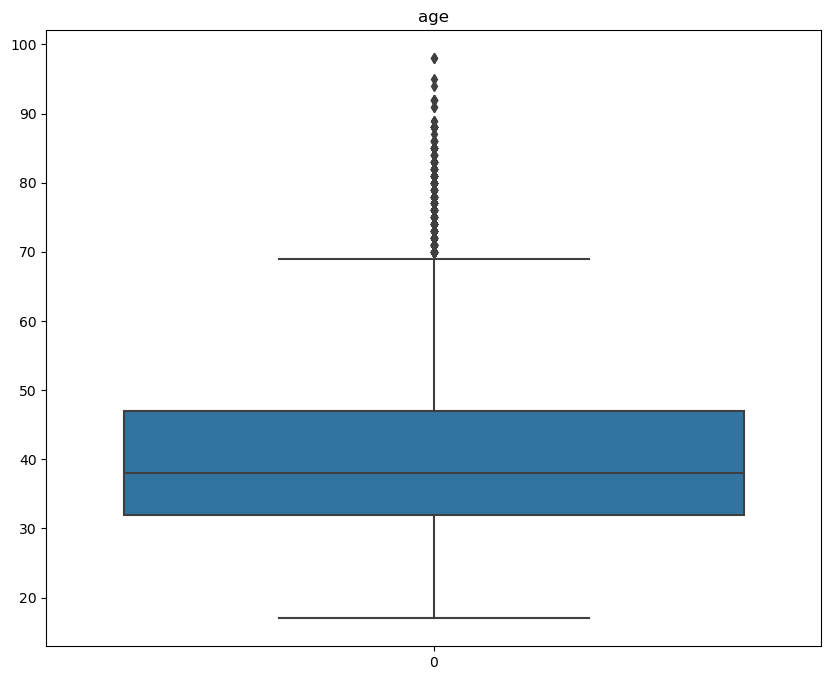

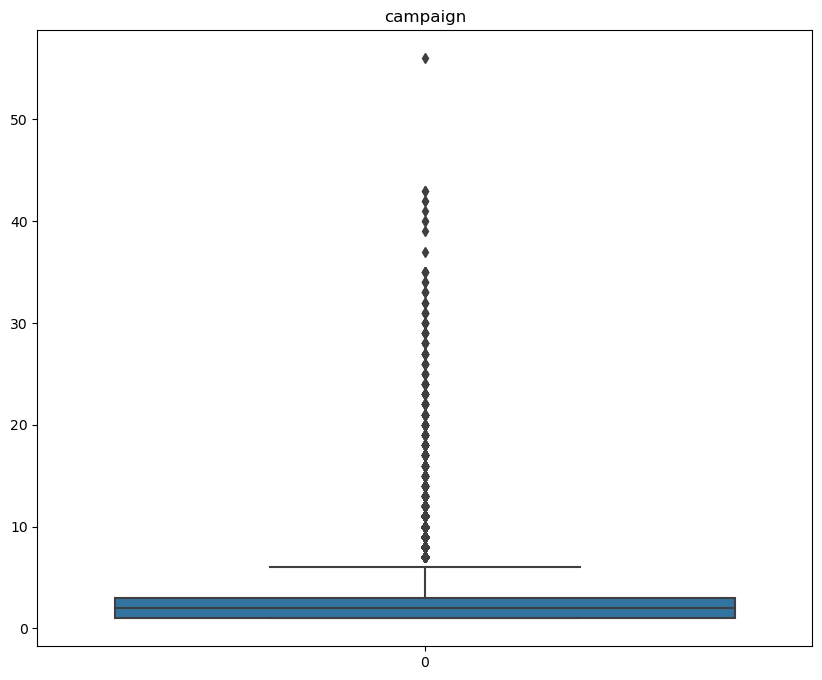

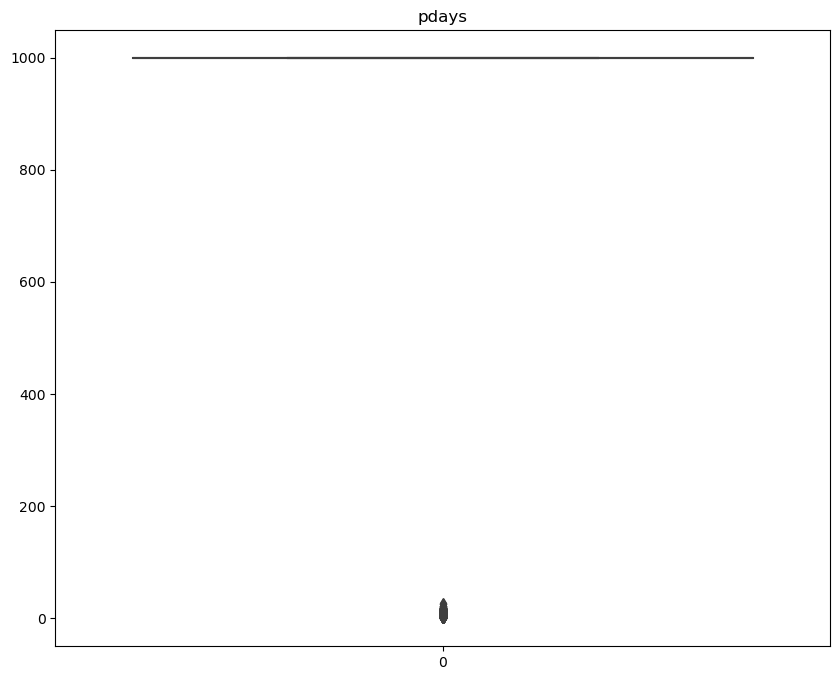

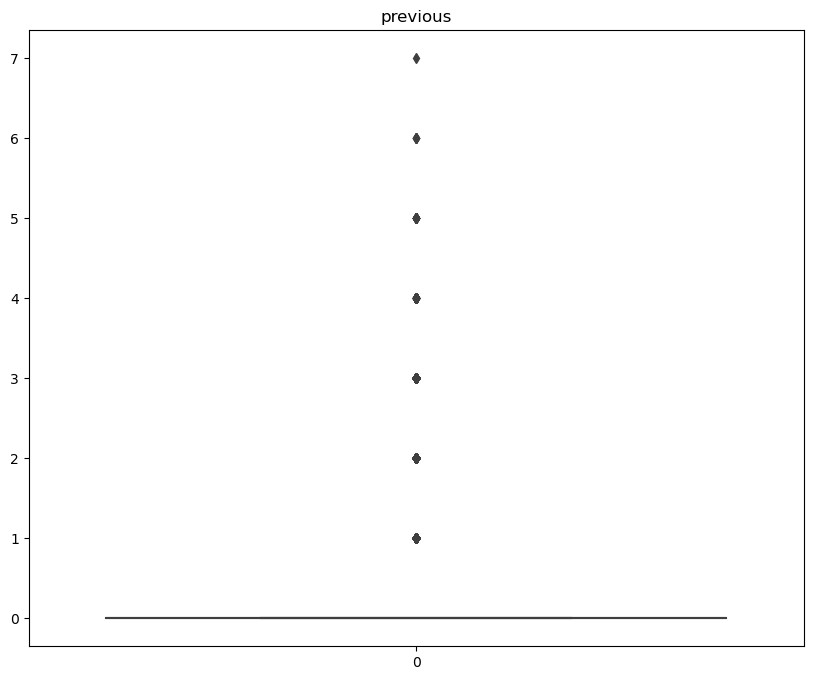

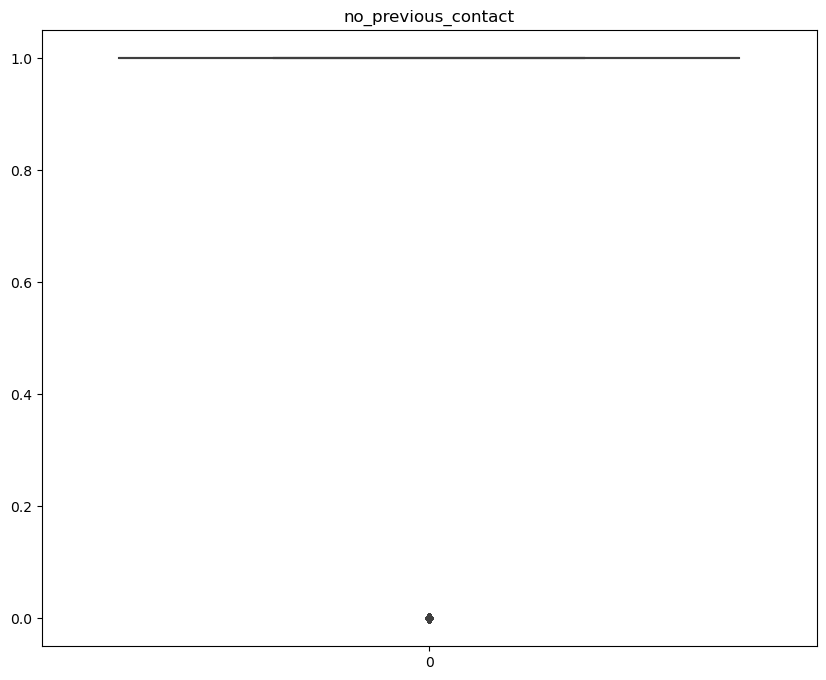

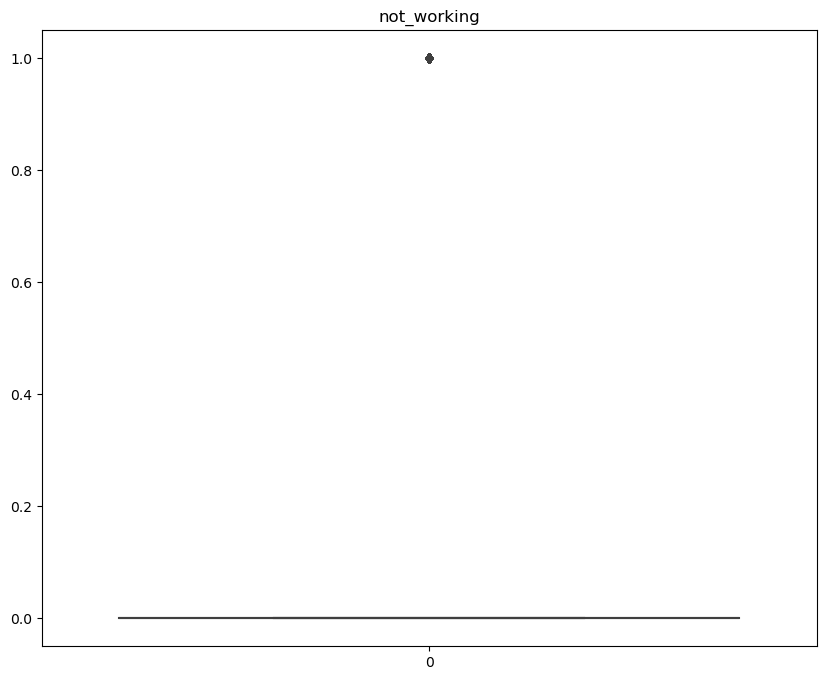

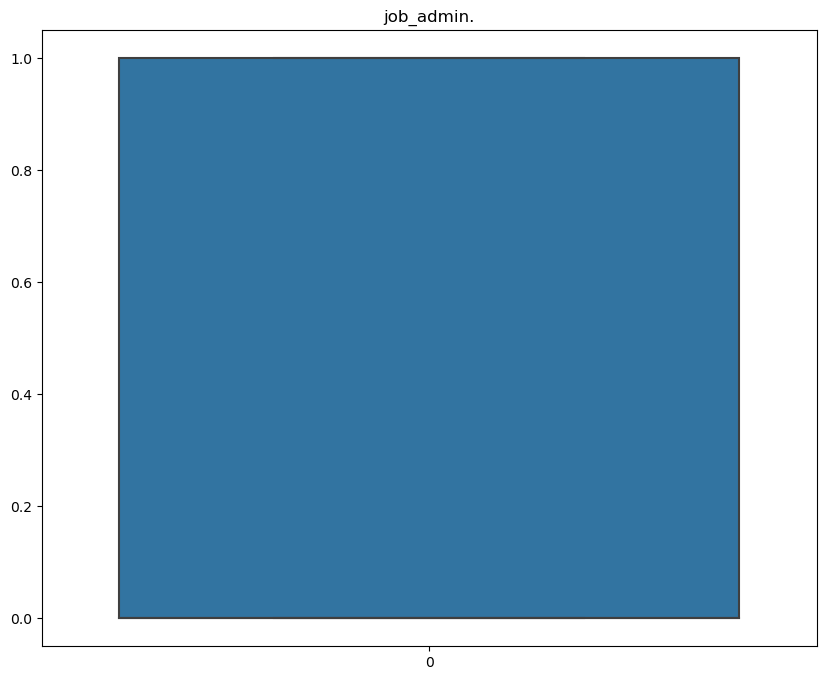

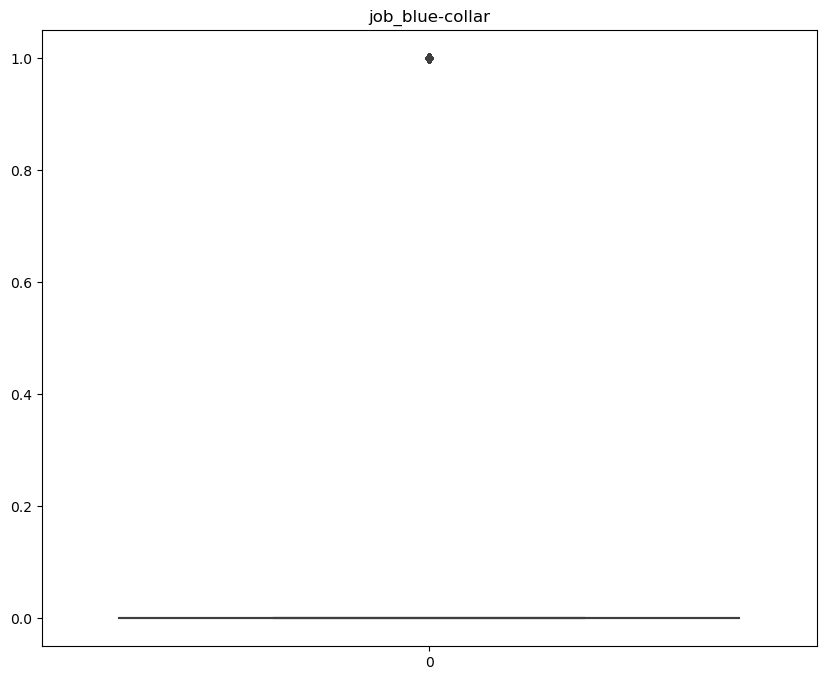

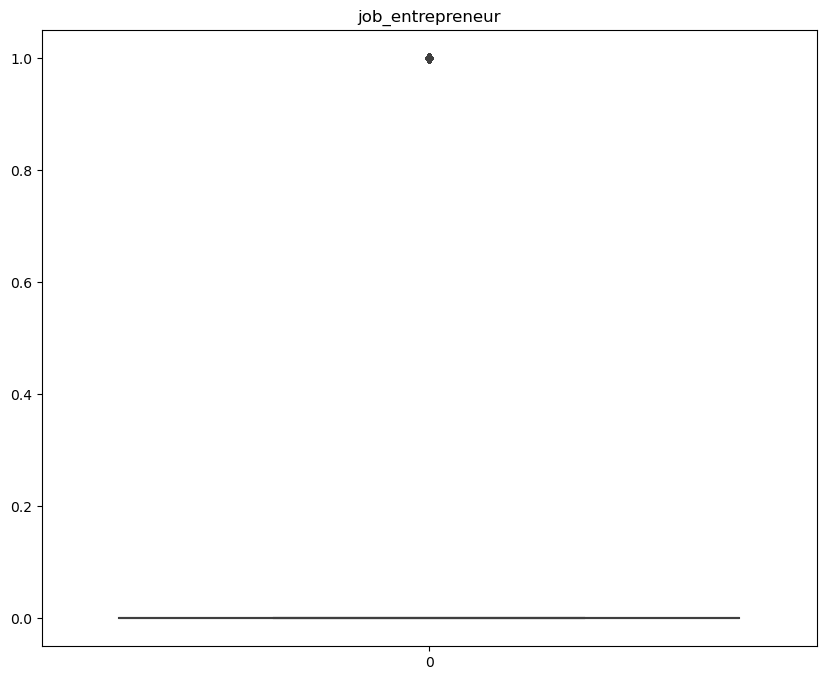

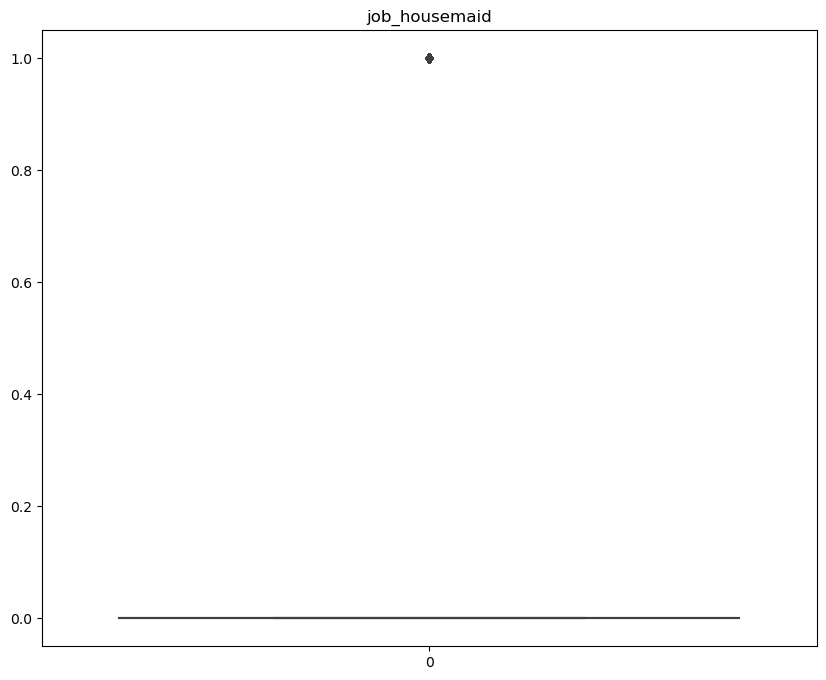

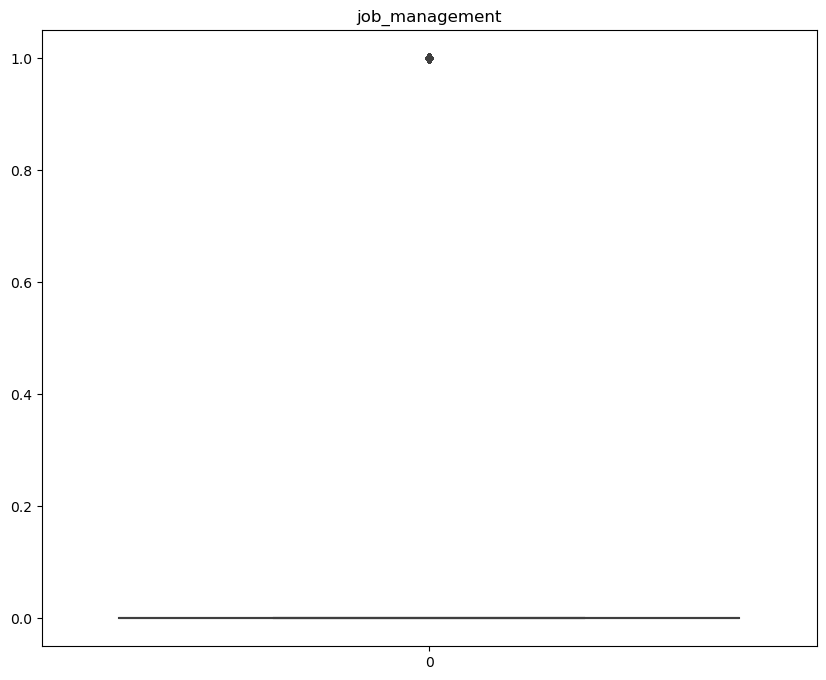

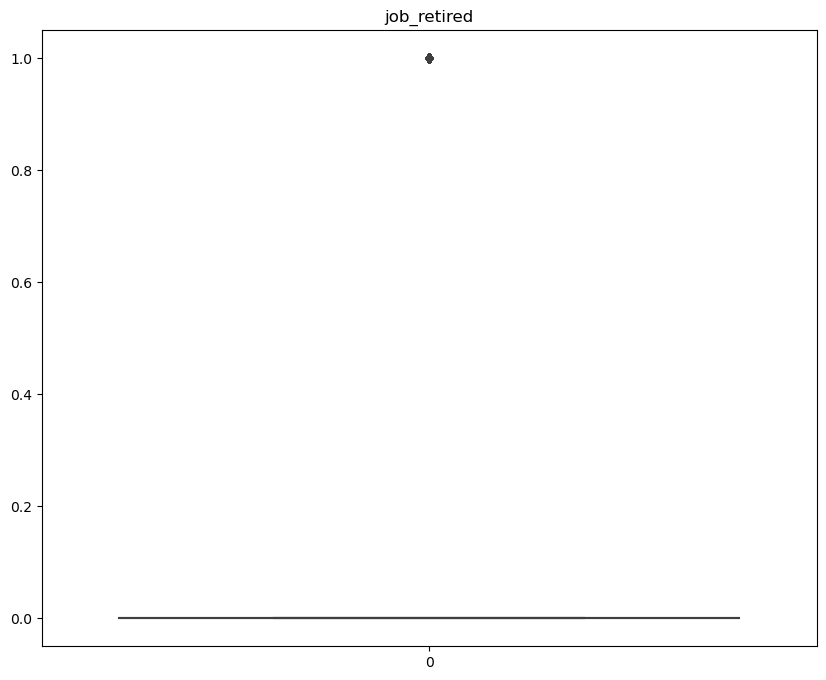

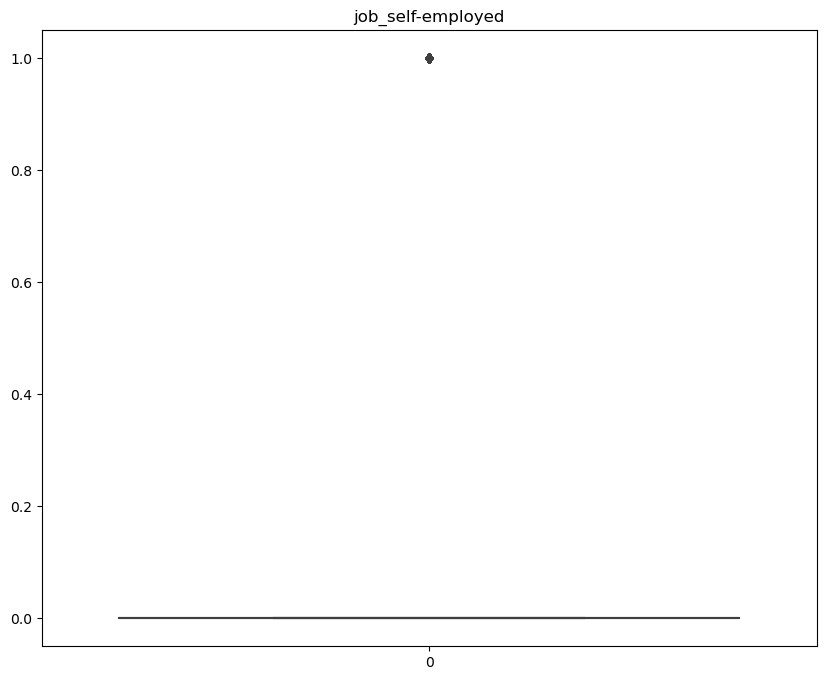

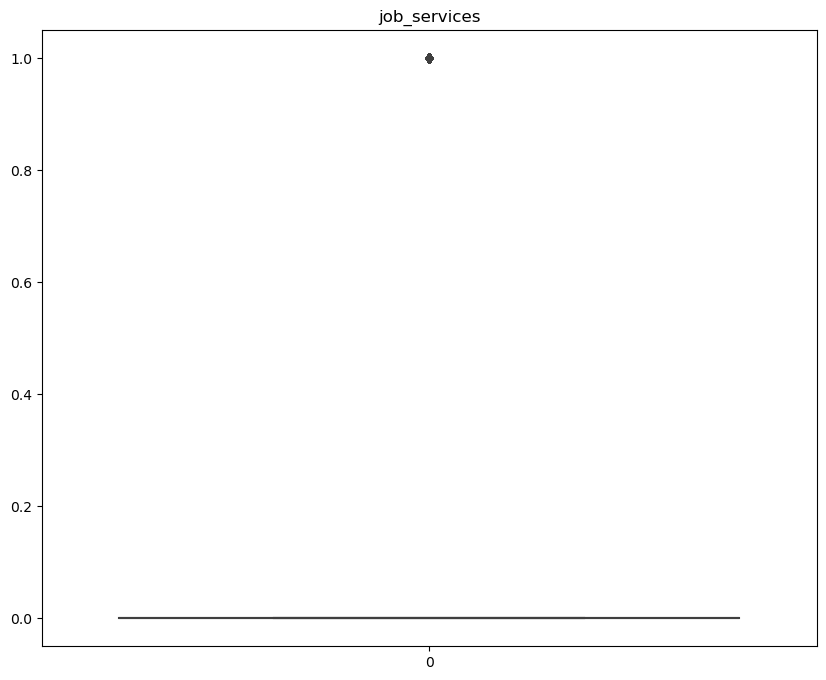

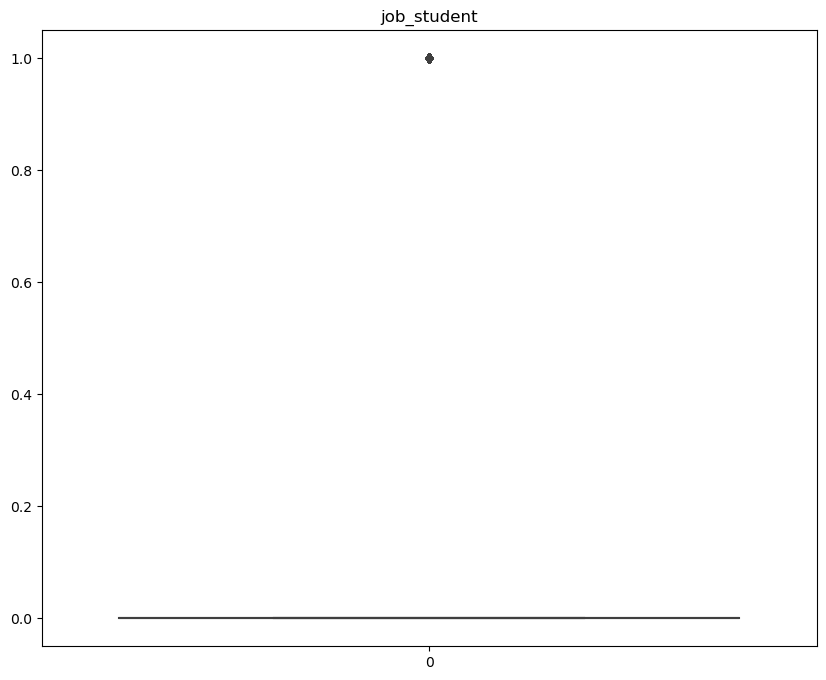

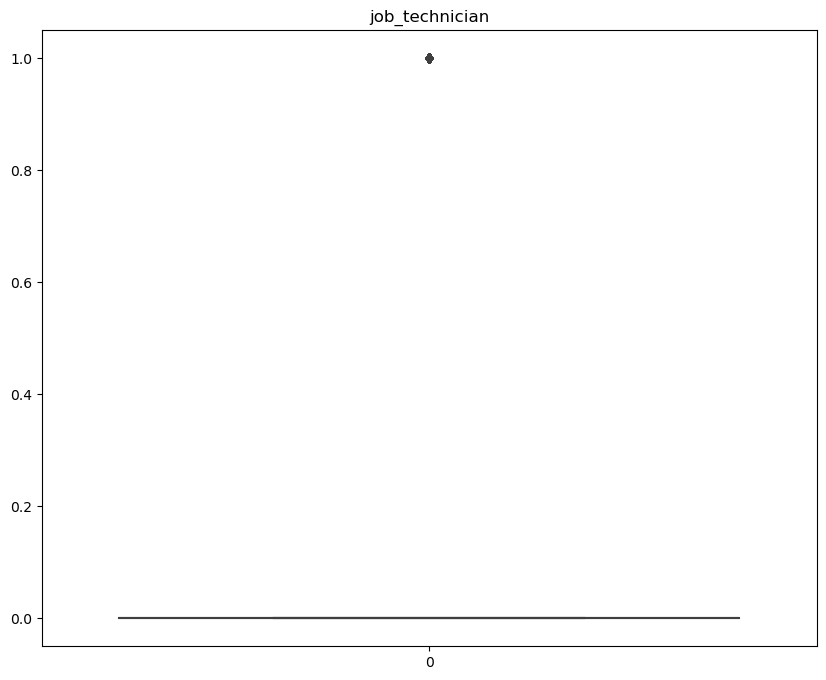

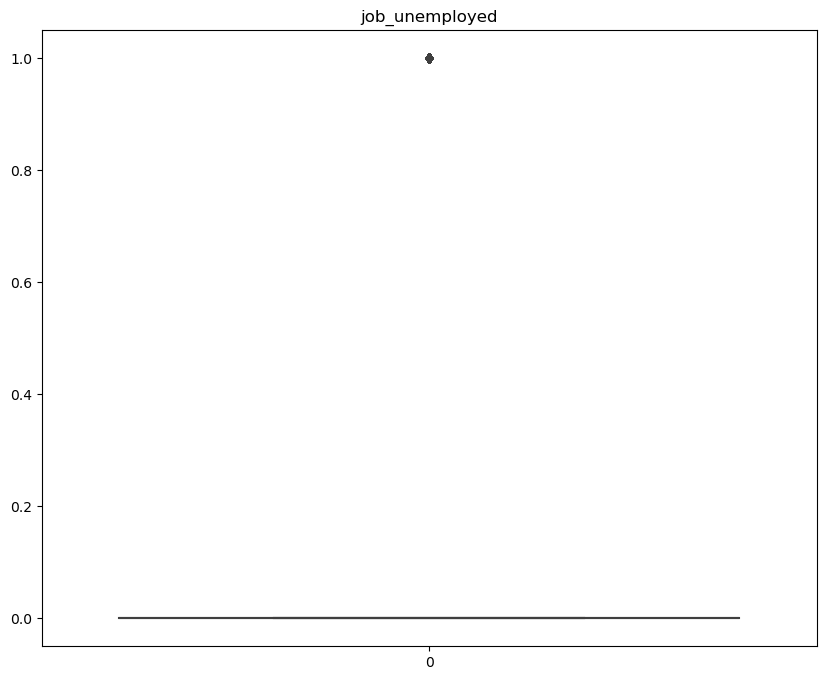

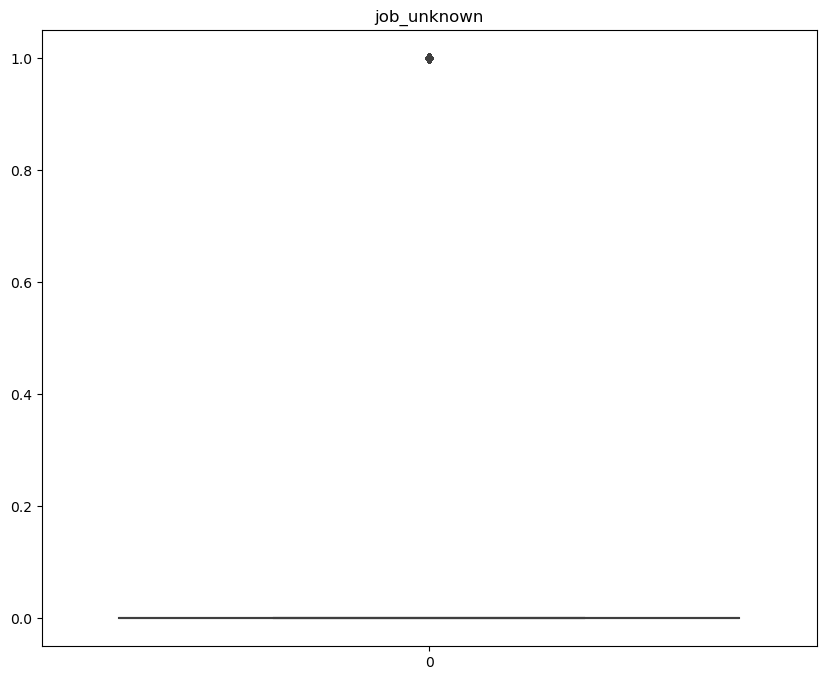

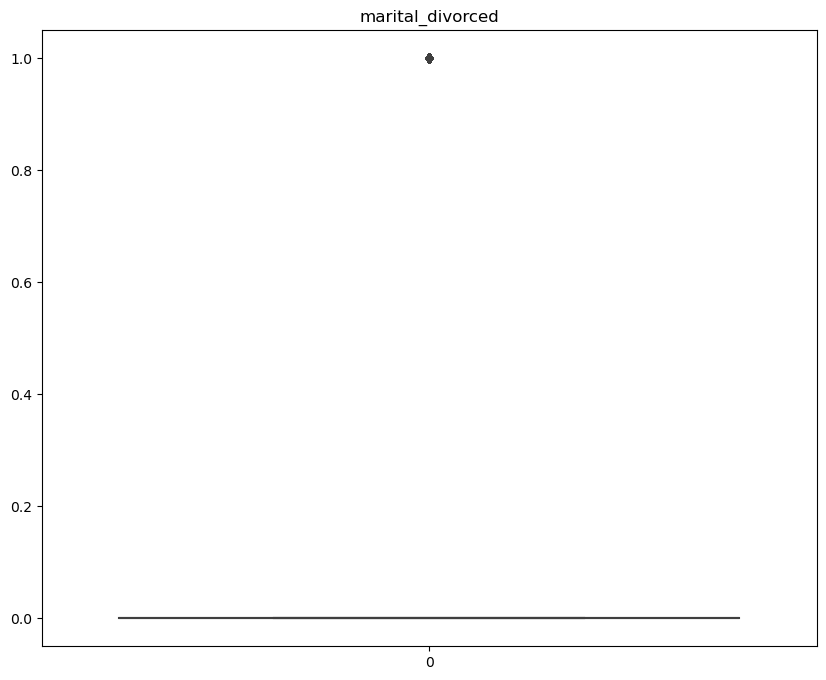

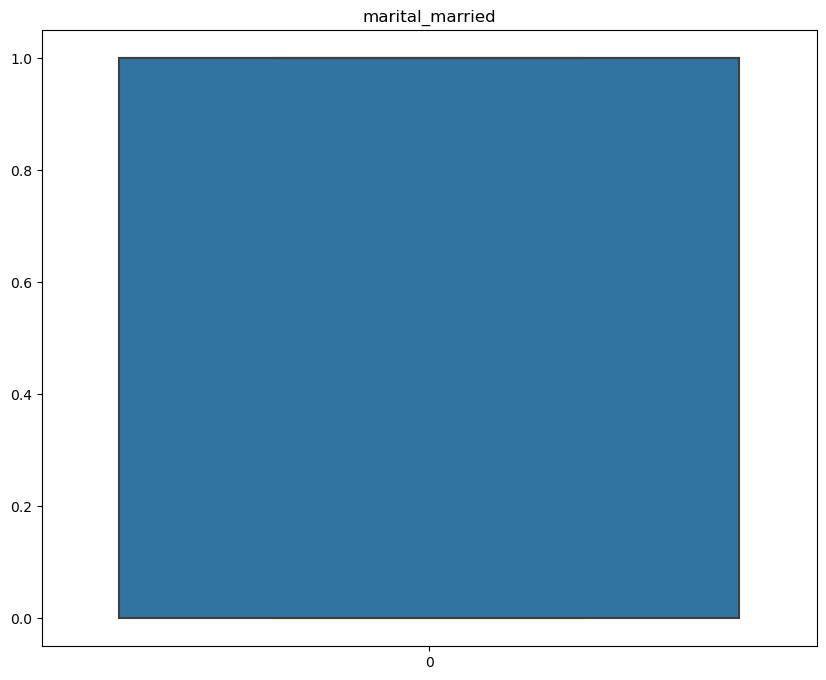

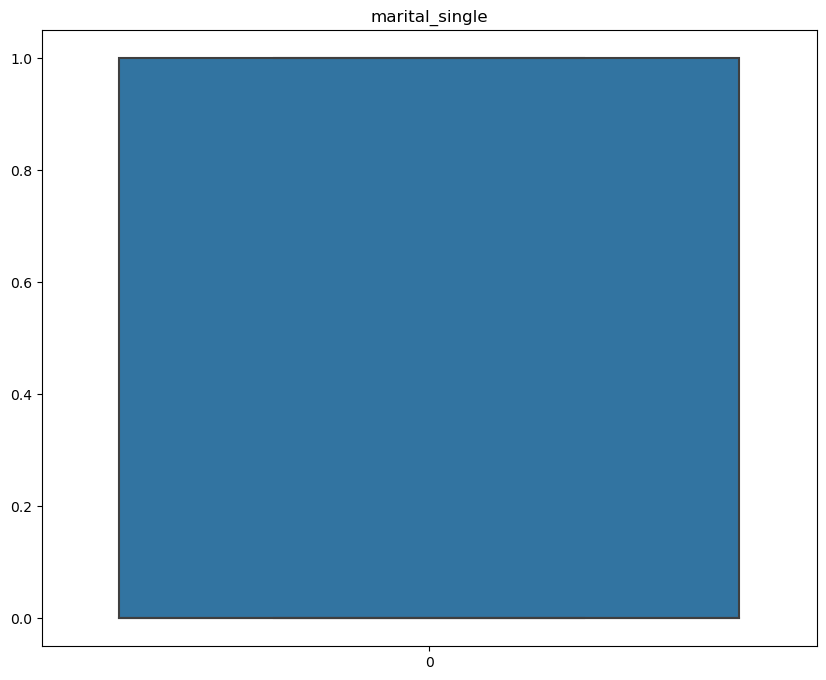

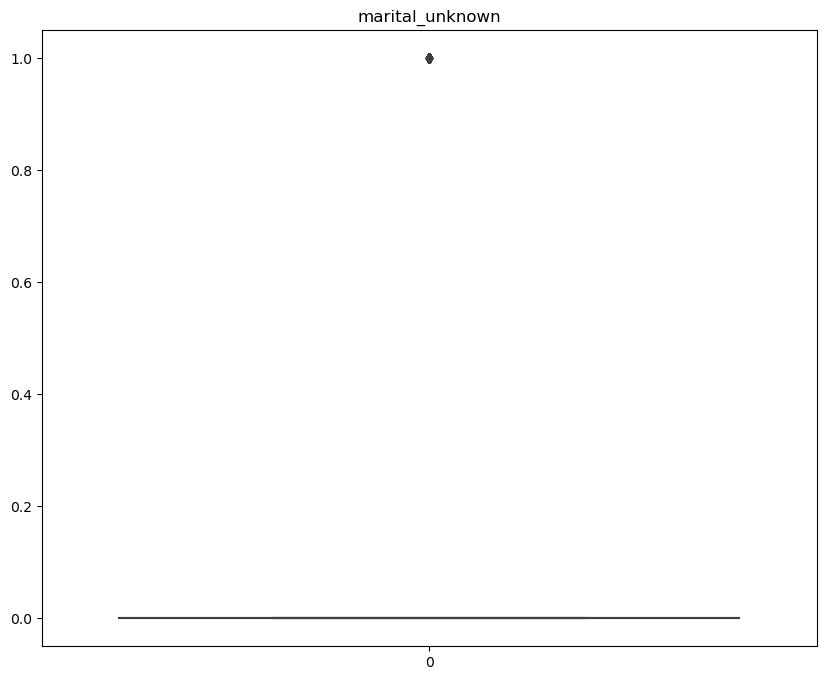

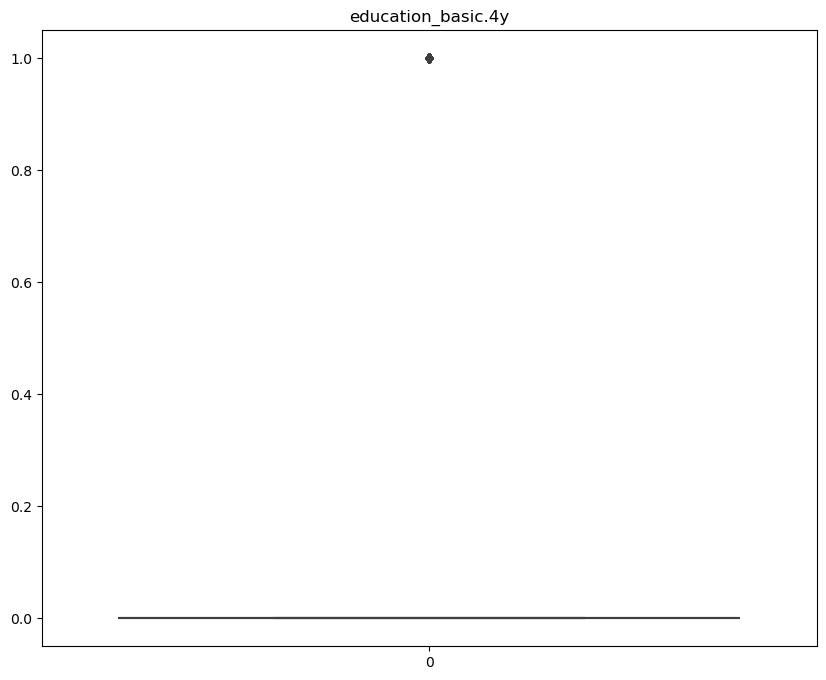

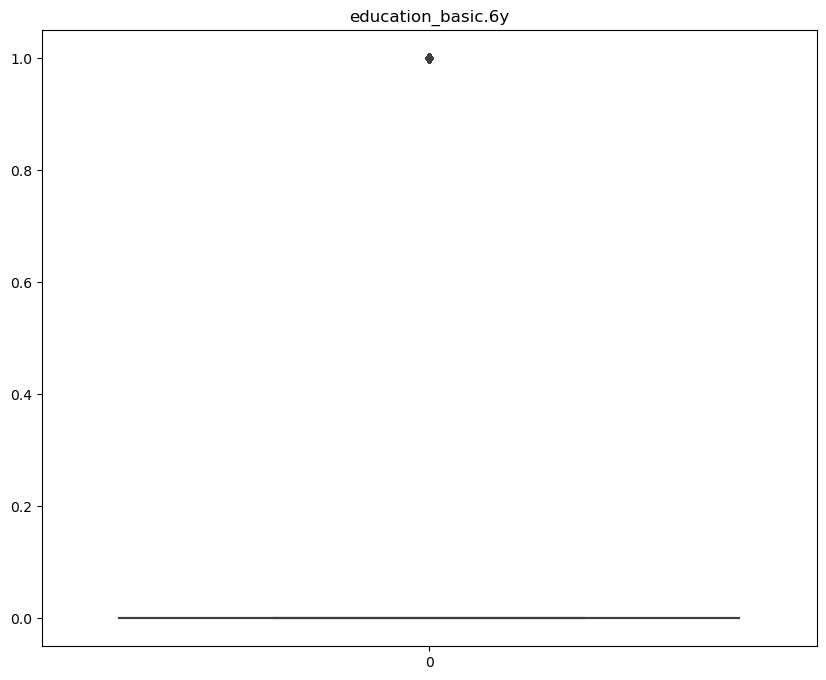

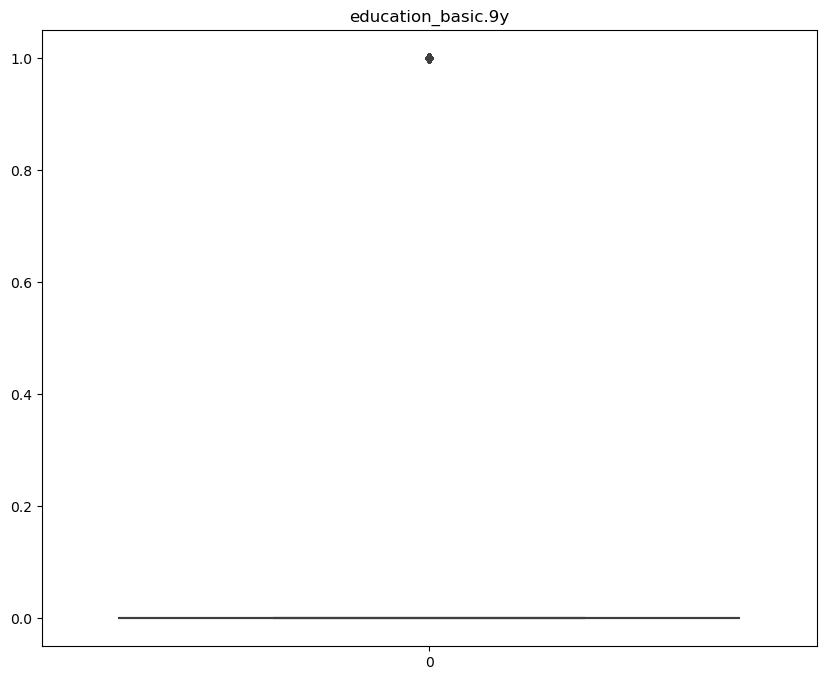

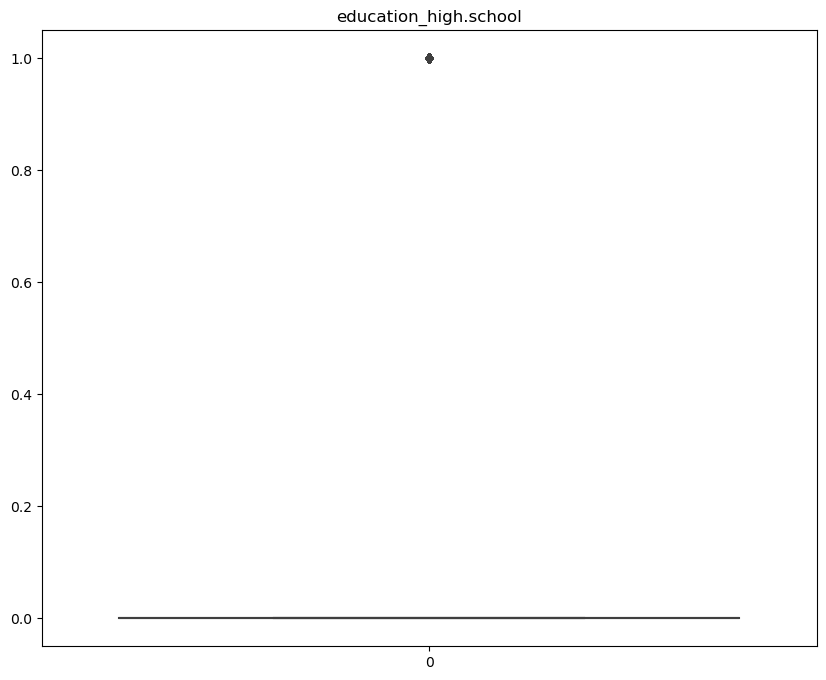

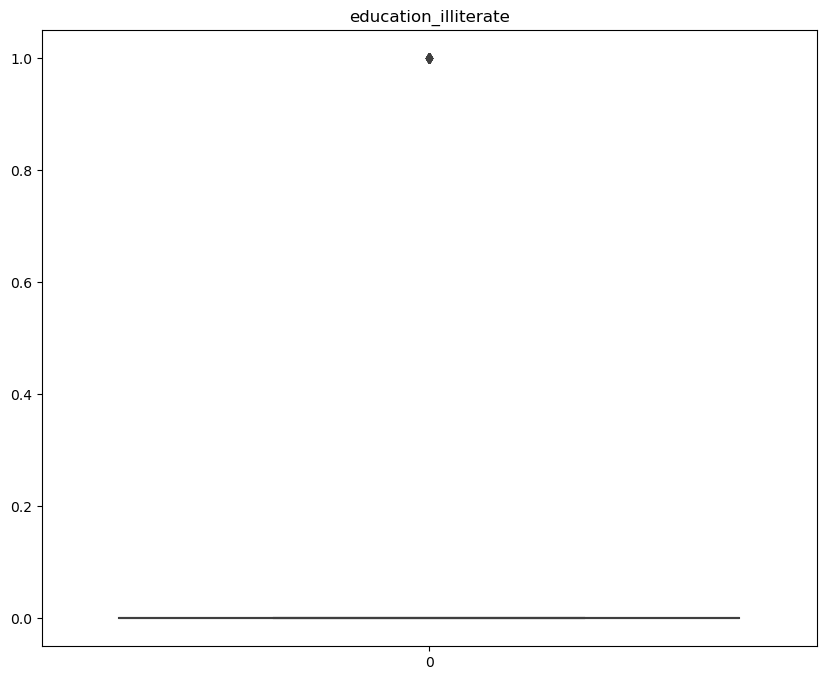

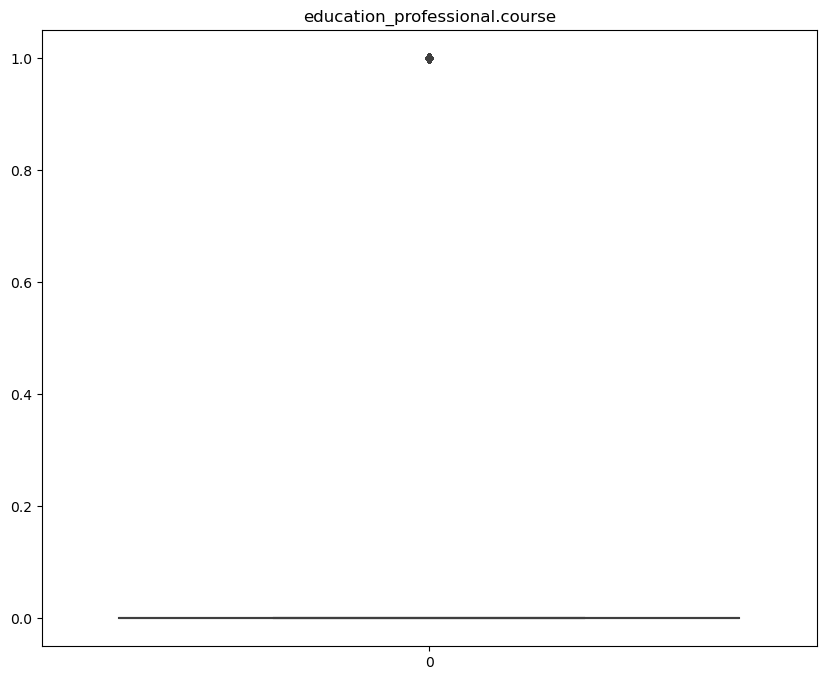

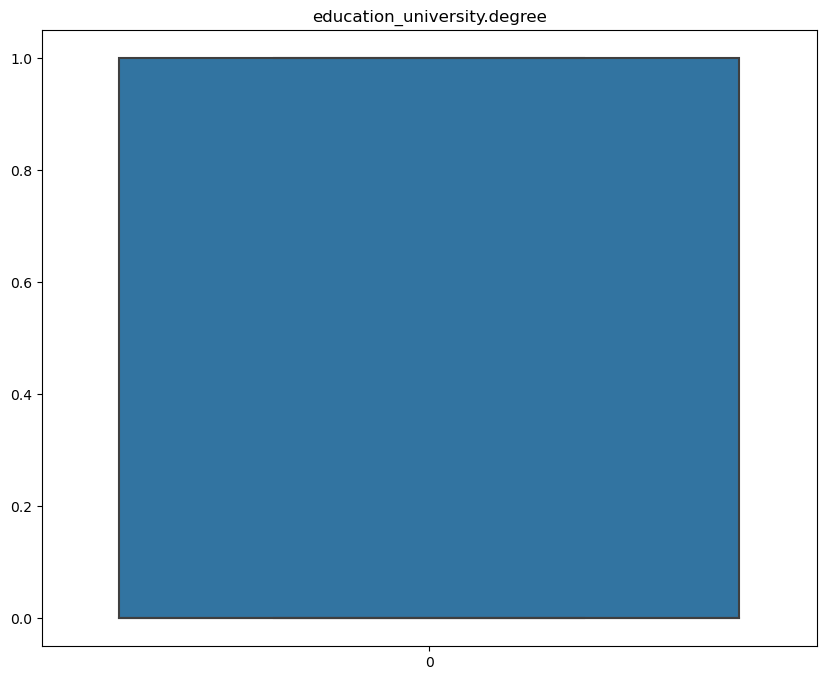

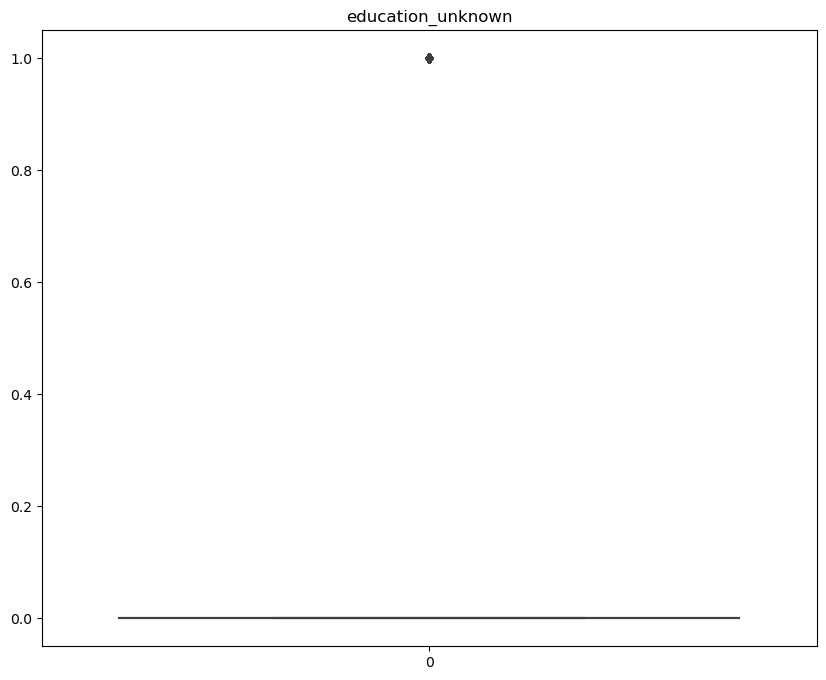

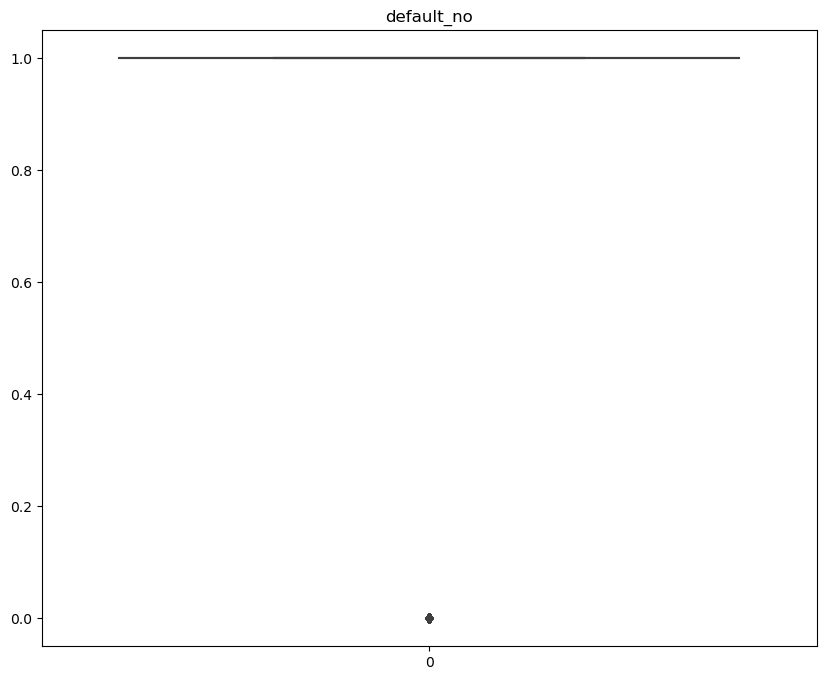

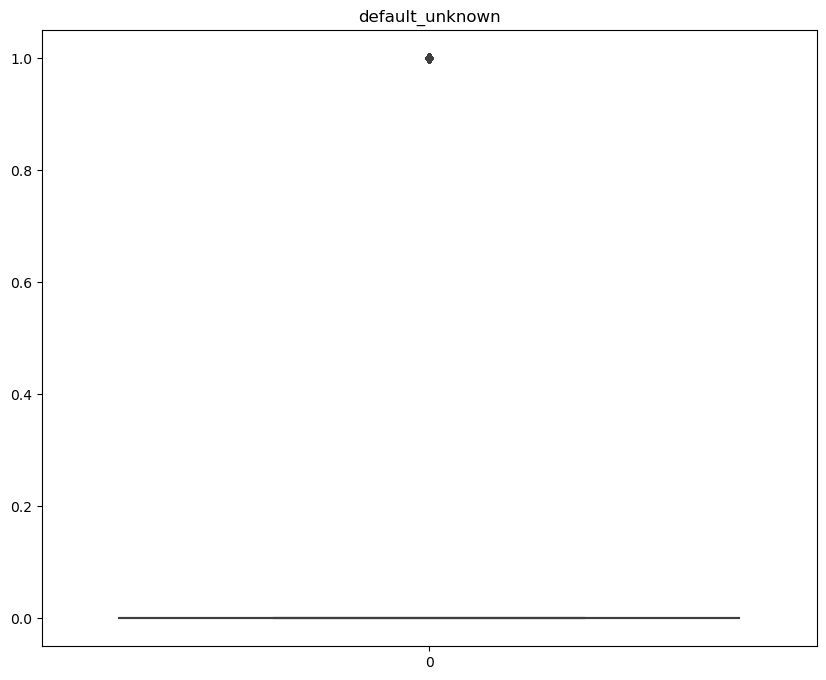

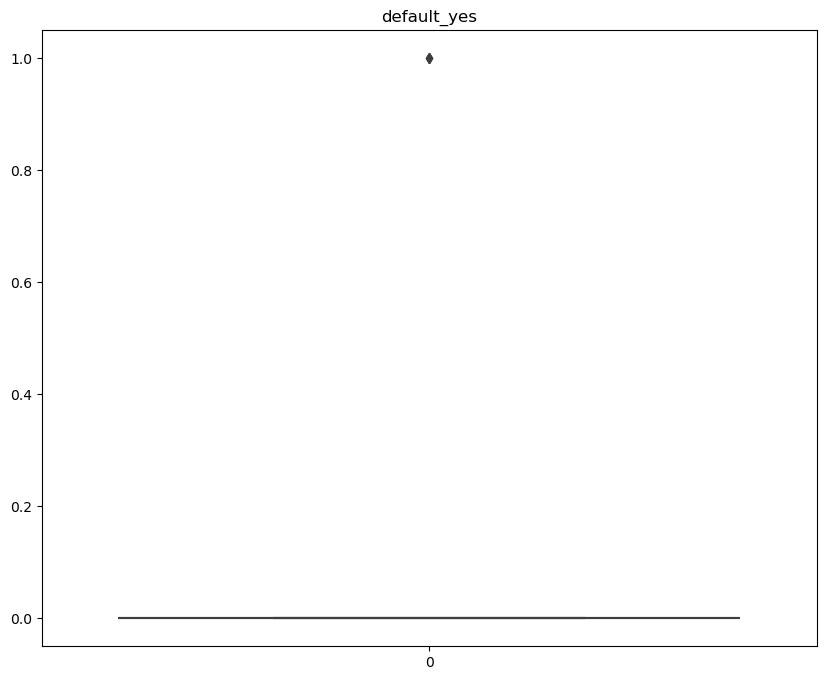

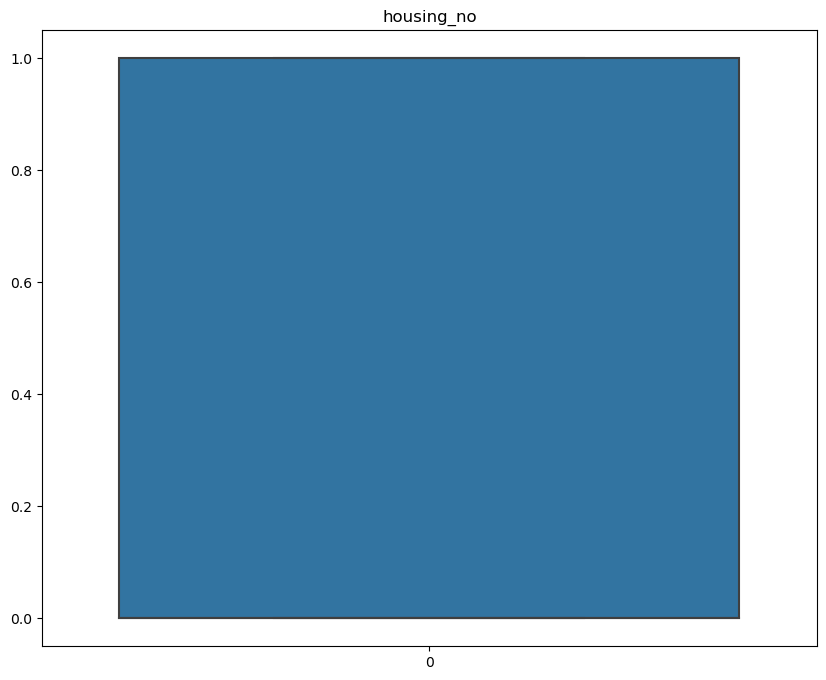

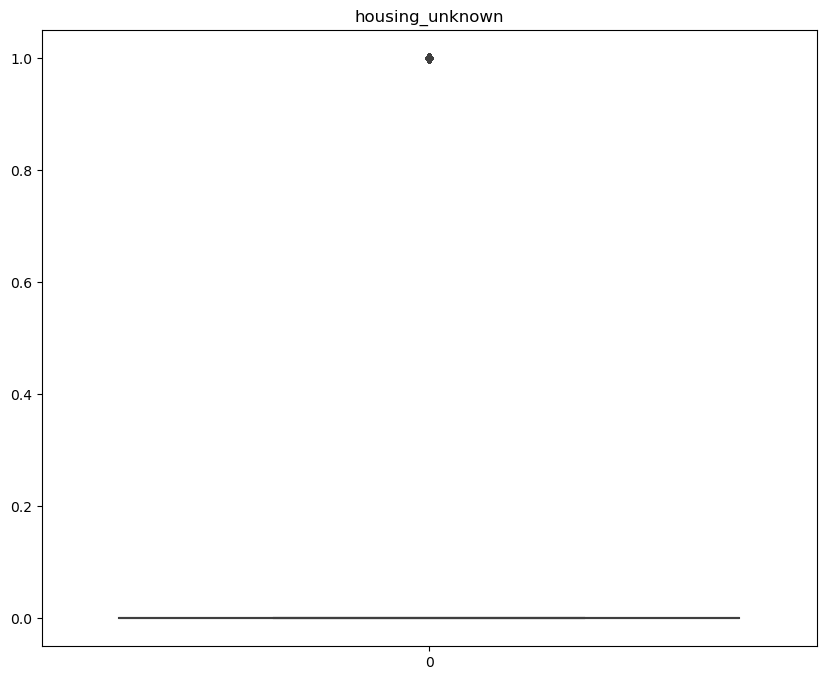

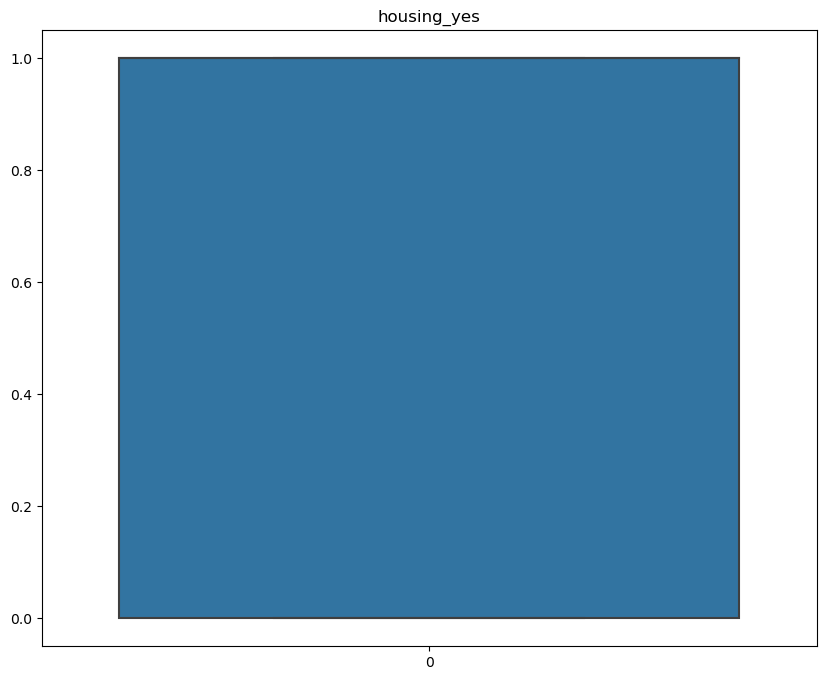

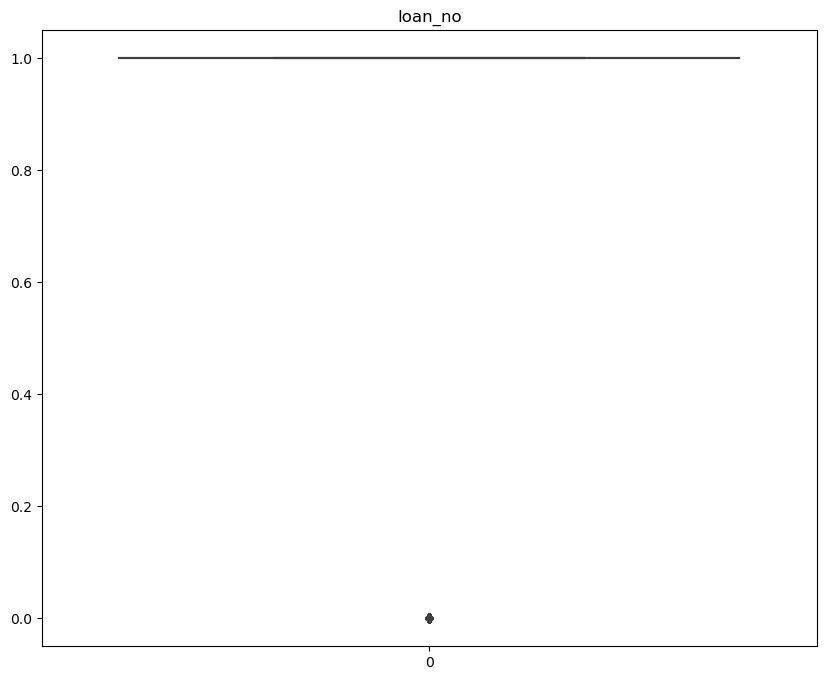

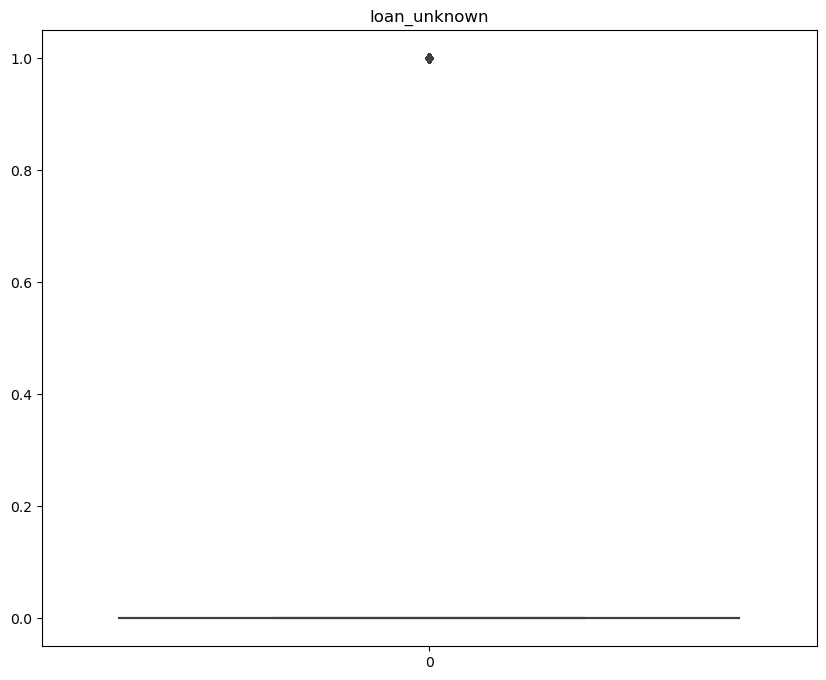

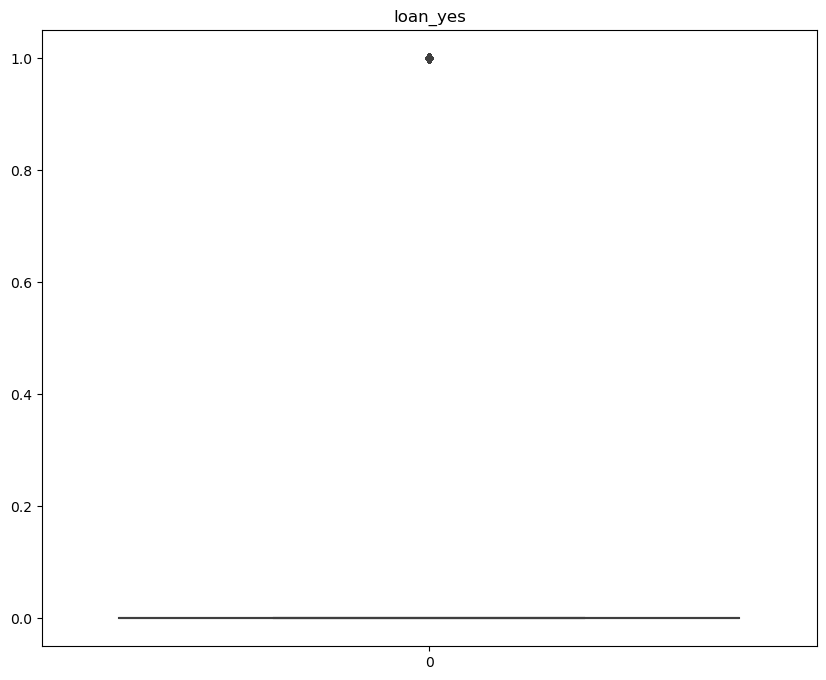

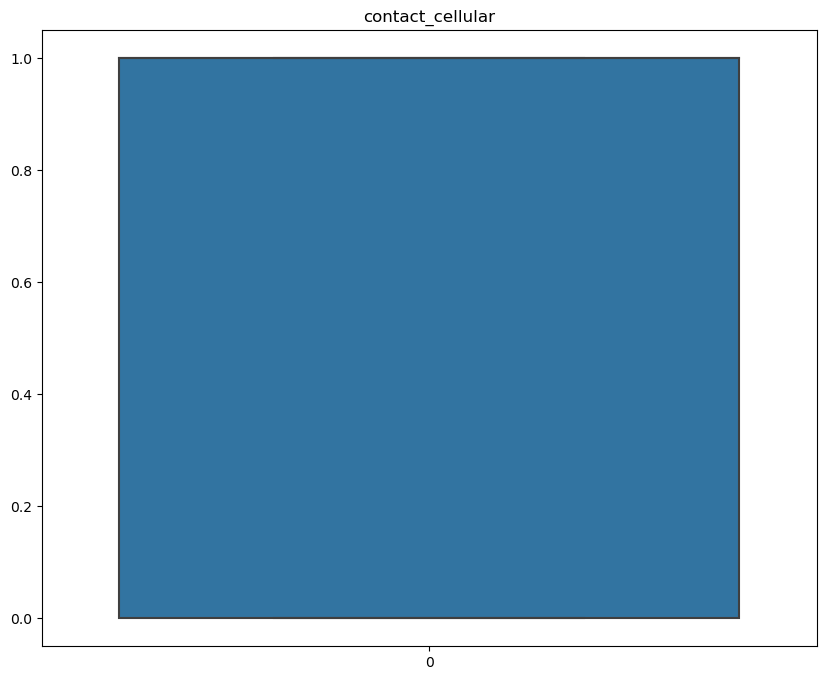

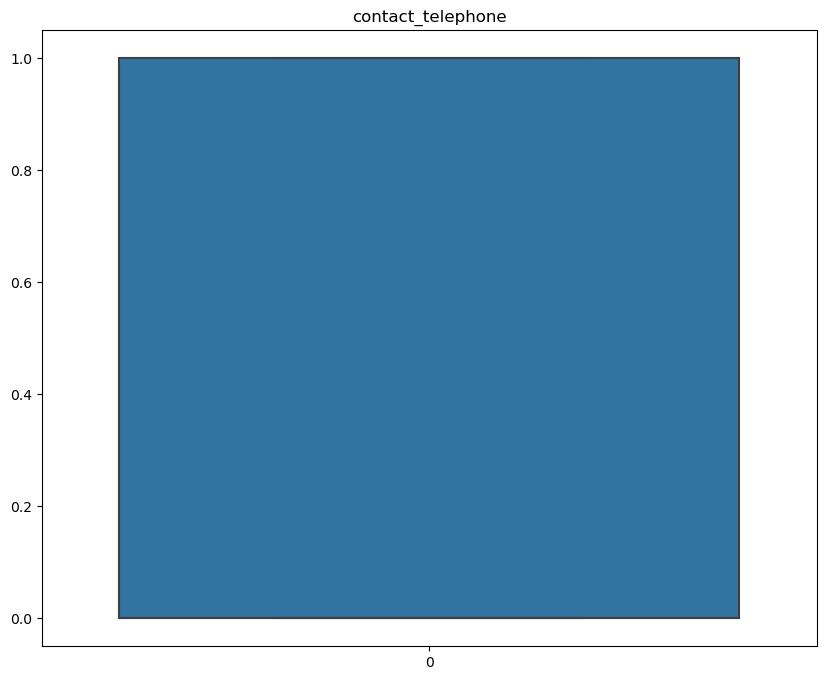

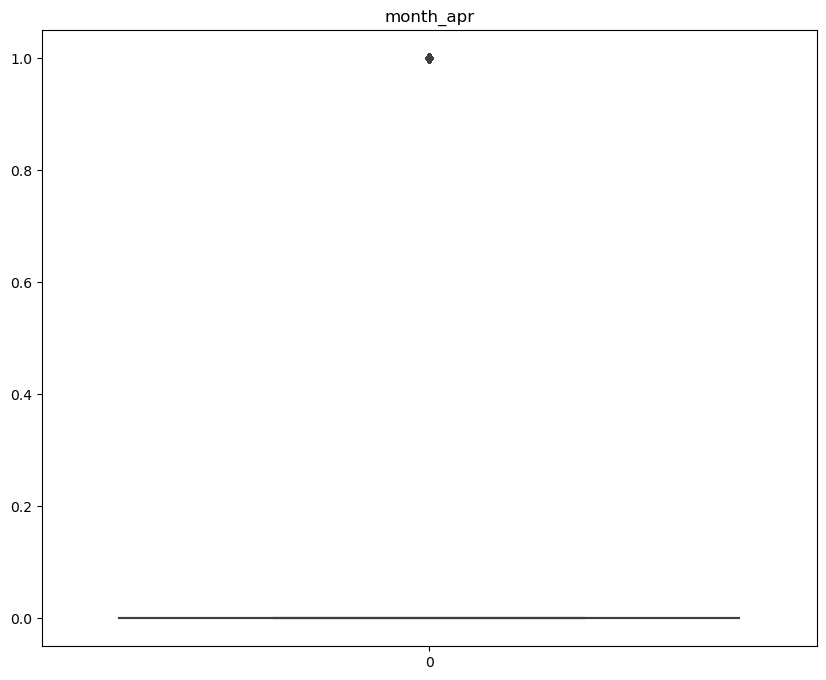

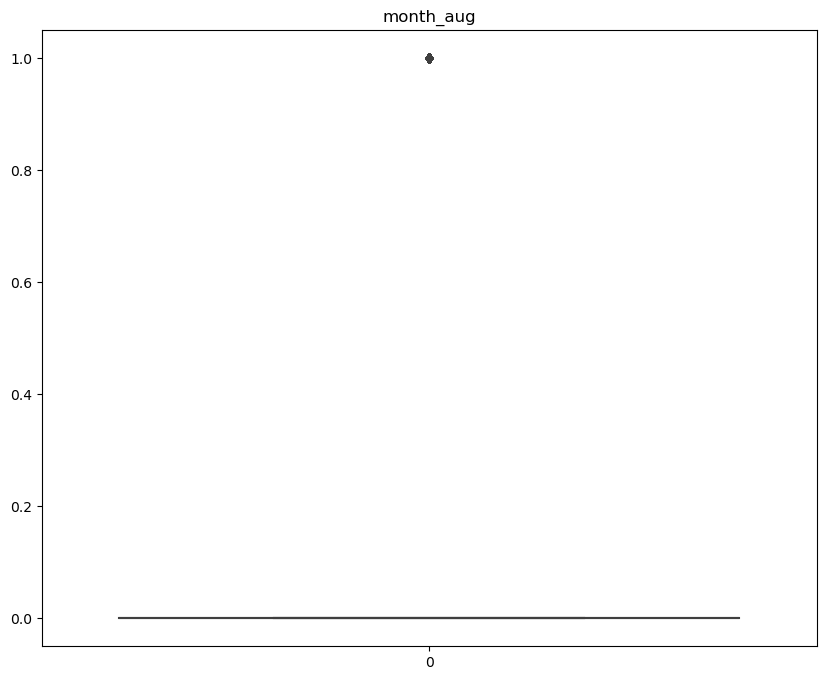

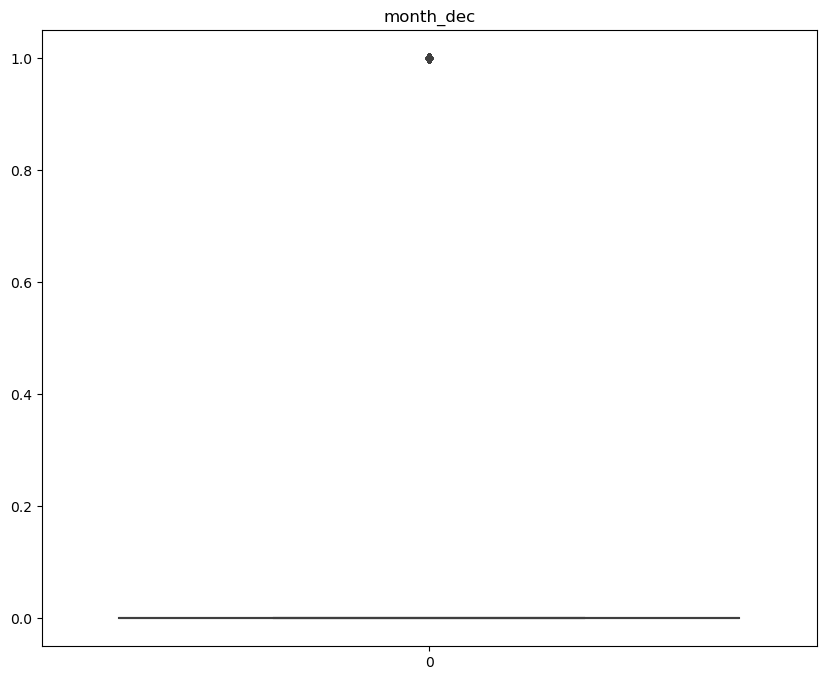

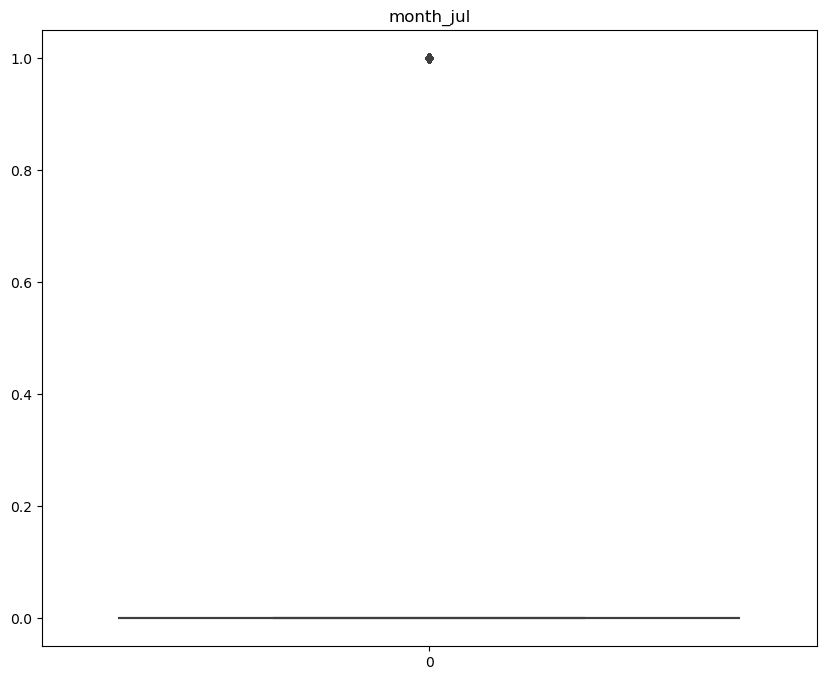

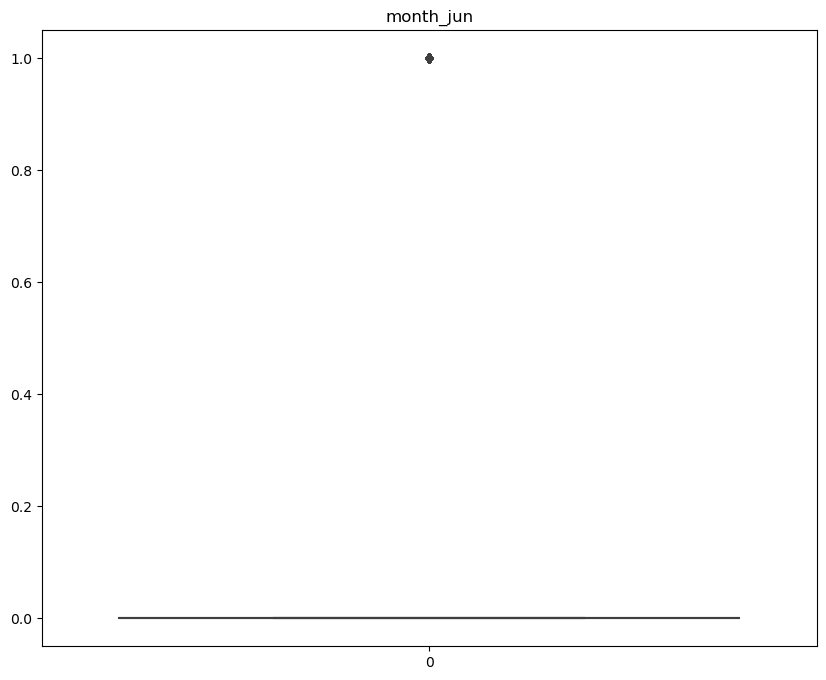

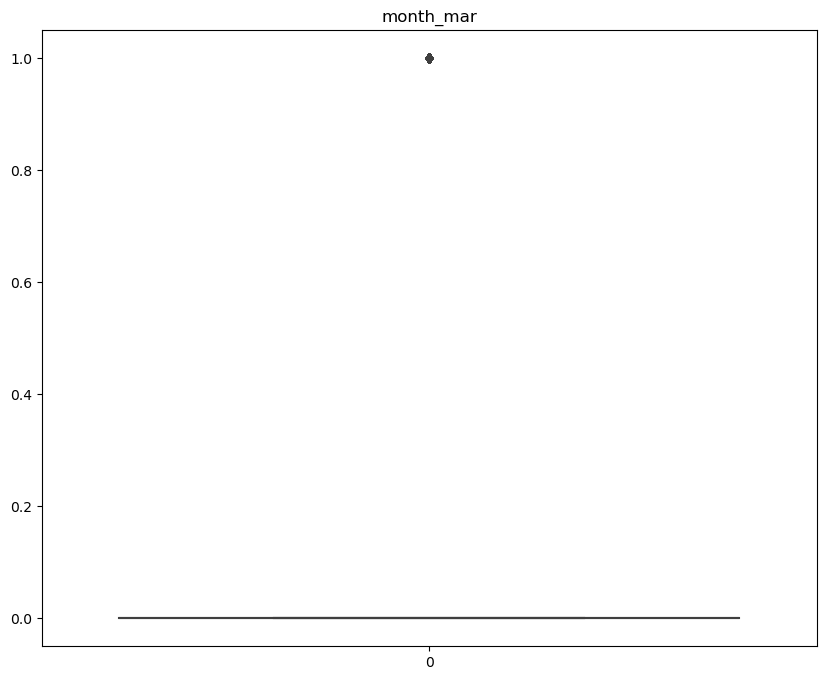

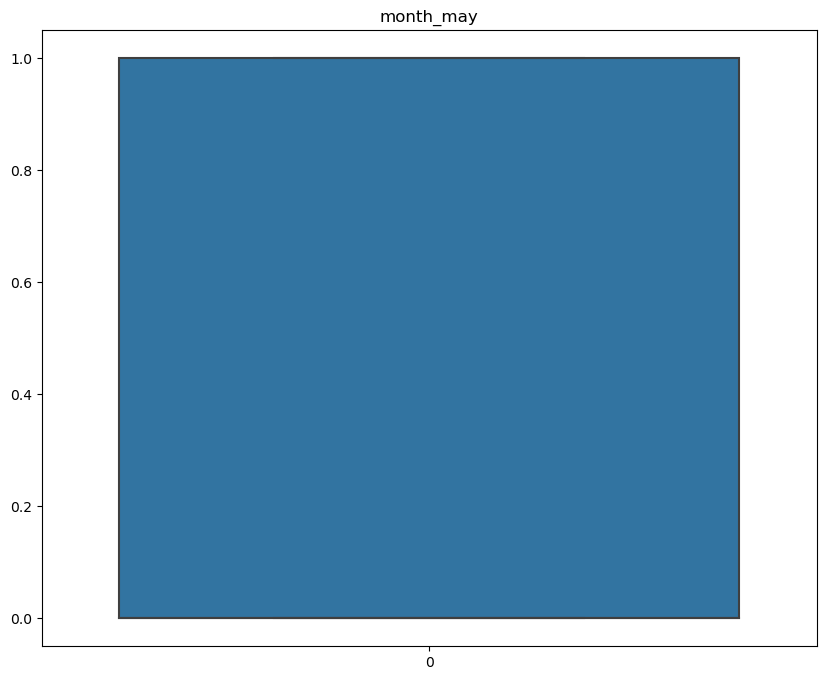

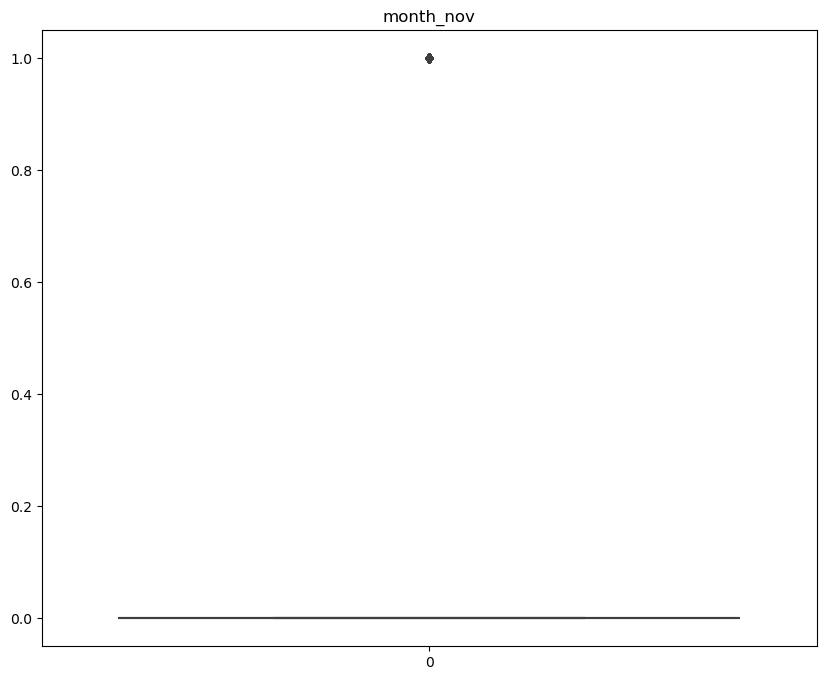

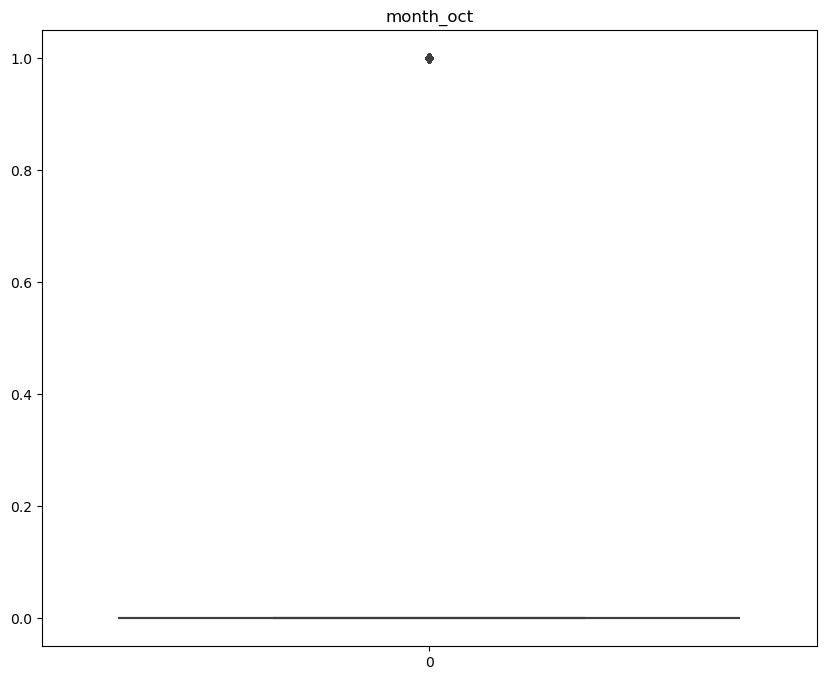

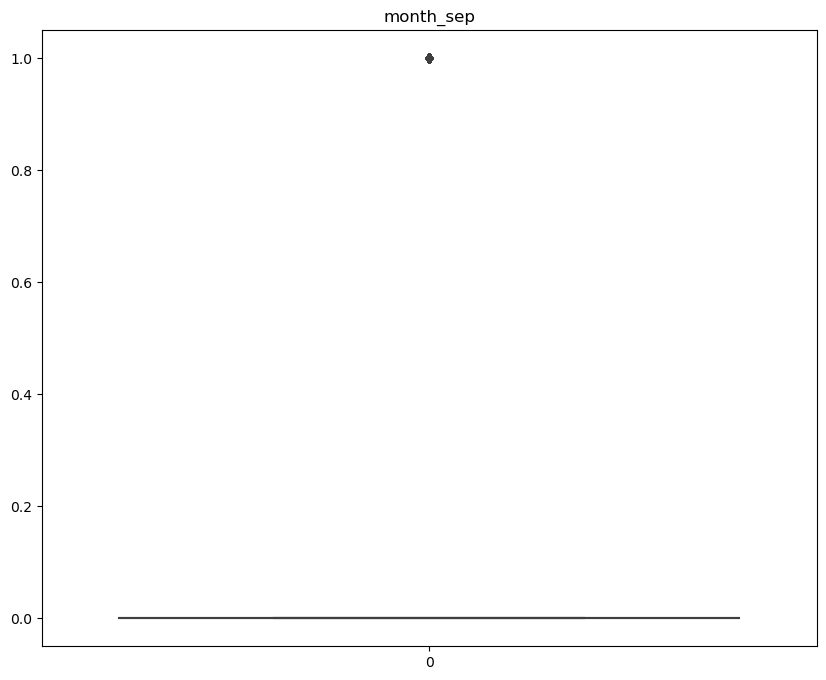

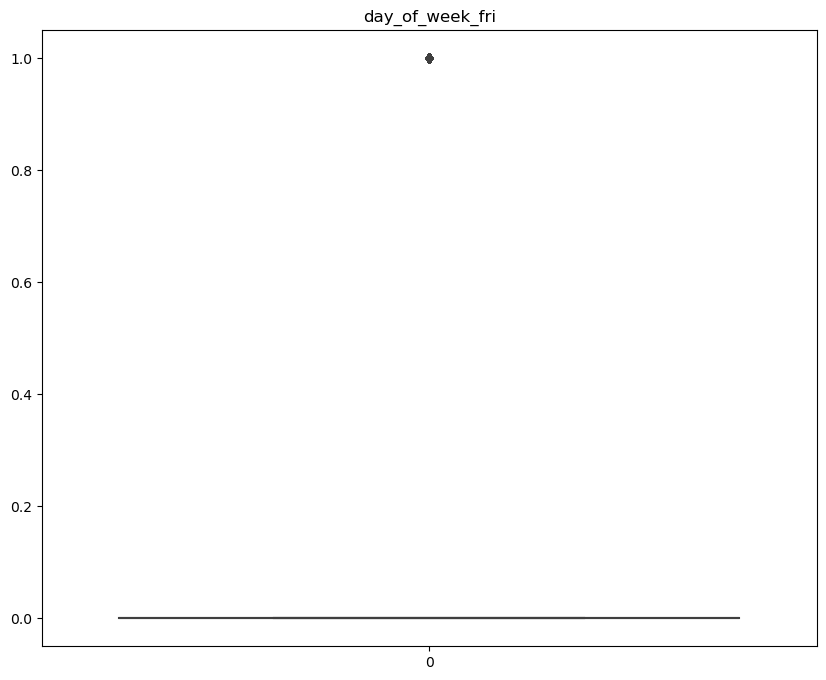

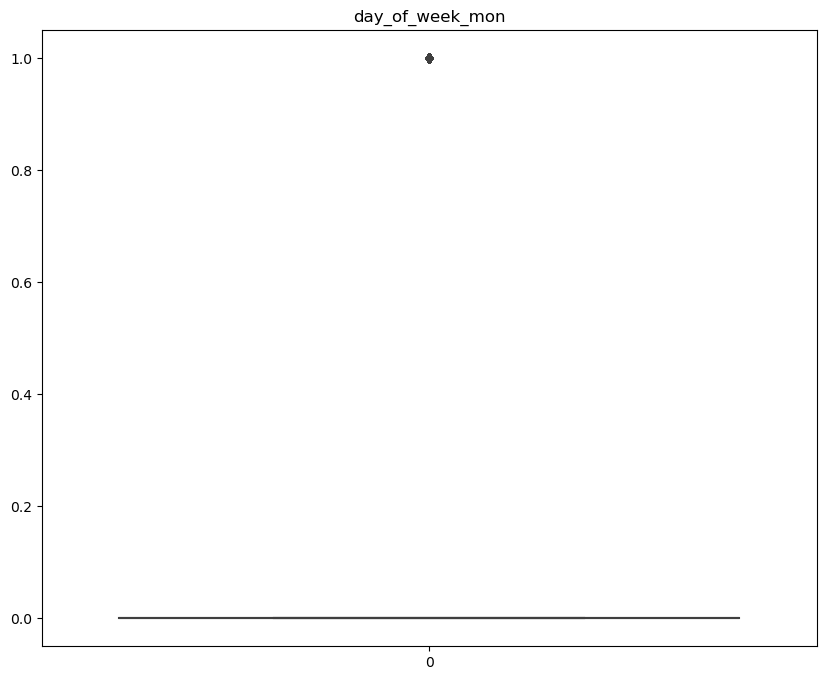

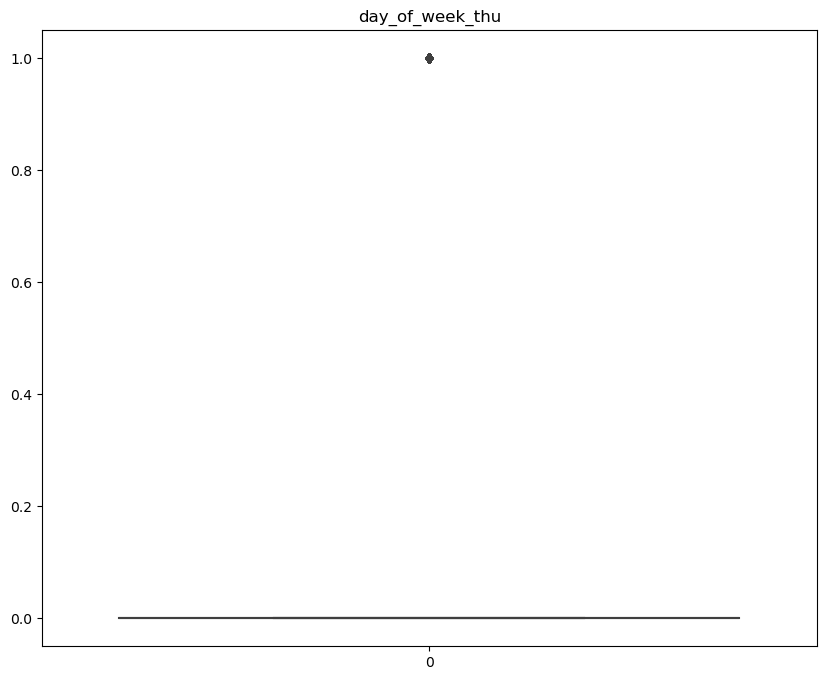

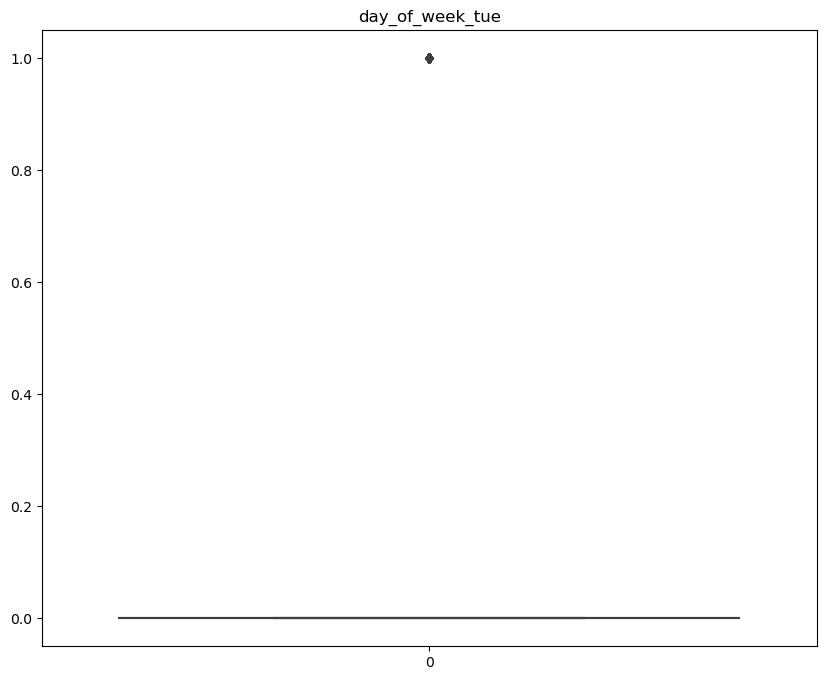

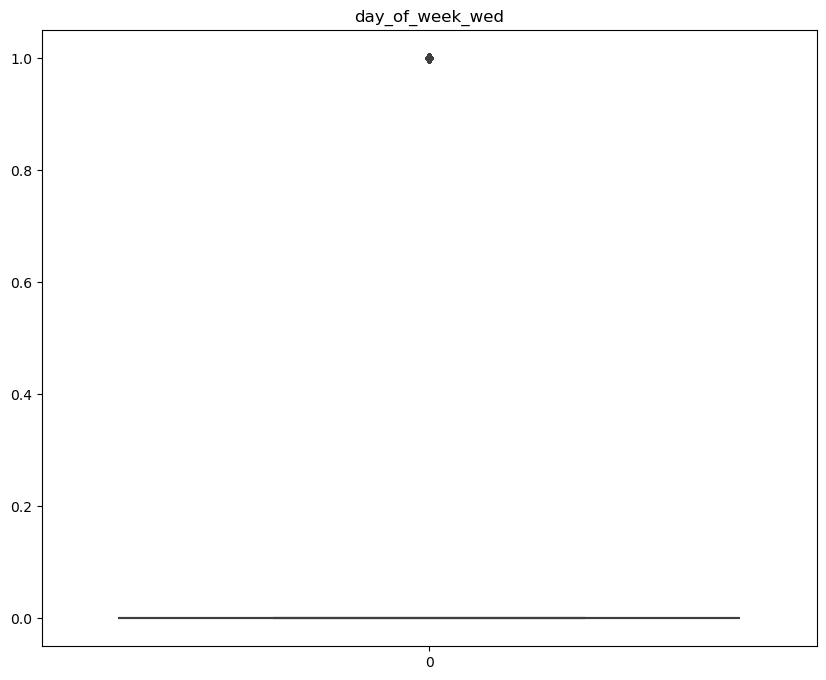

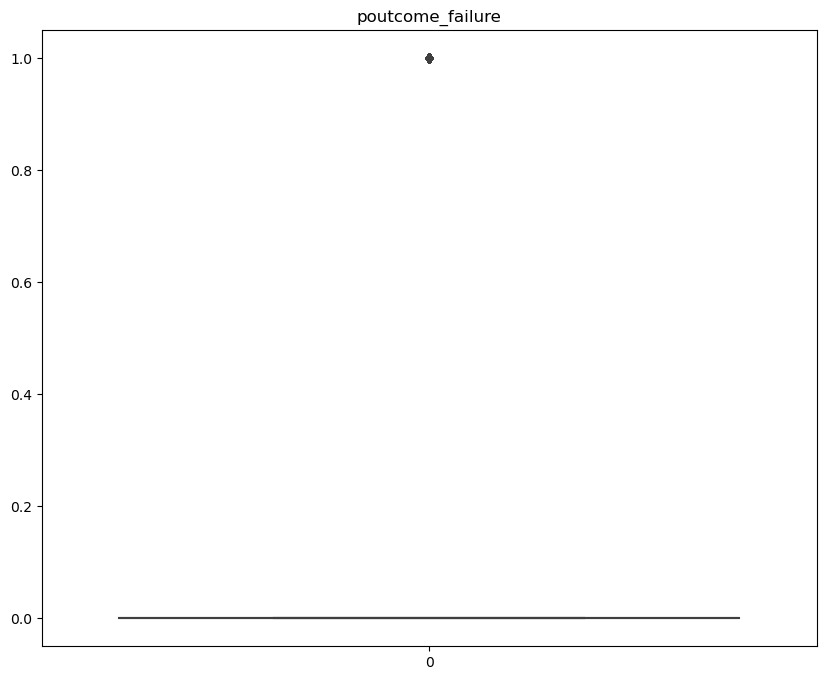

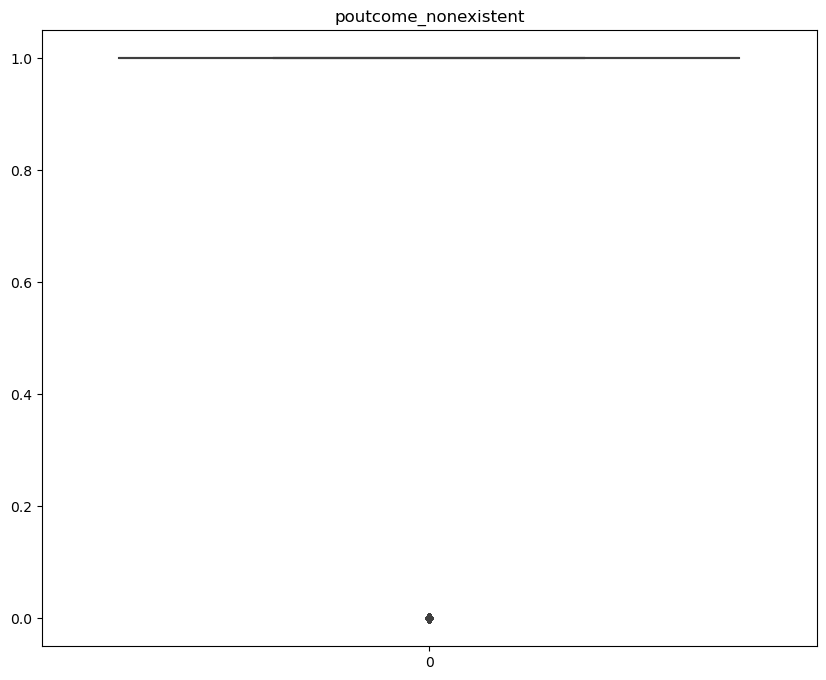

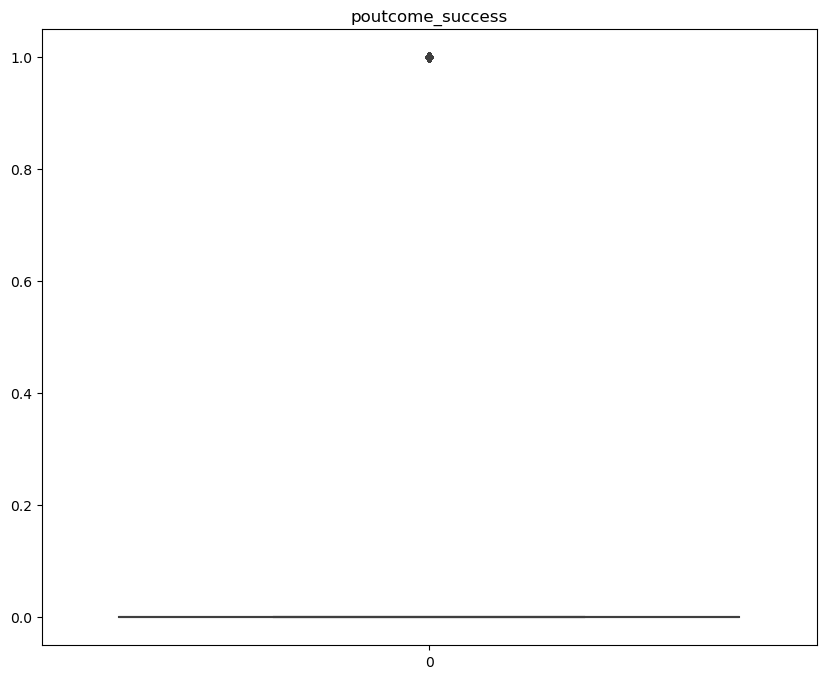

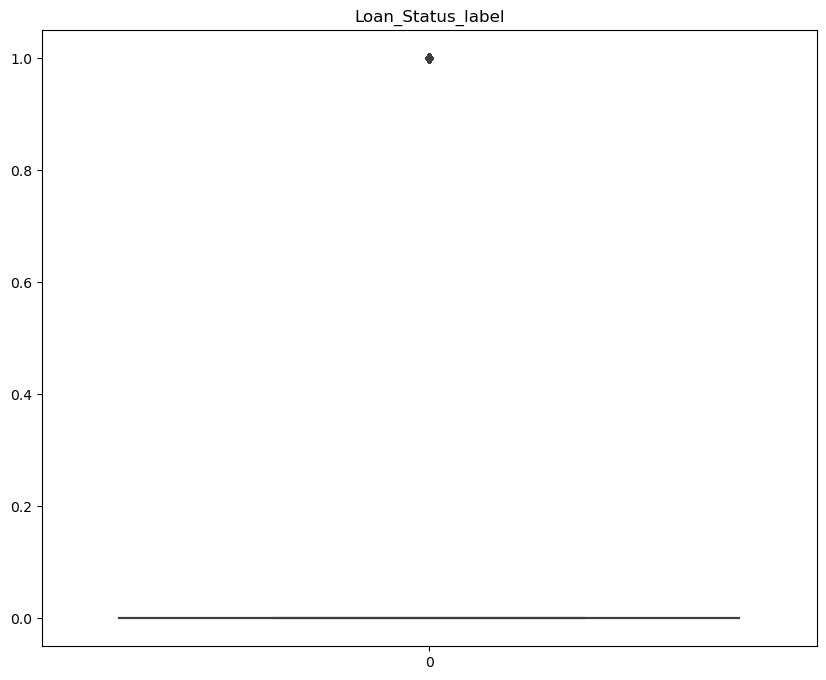

In [117]:
for col in df.columns:
    plt.figure(figsize = (10,8))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [118]:
df = df.drop_duplicates()
df.shape

(38771, 60)

In [119]:
df['Loan_Status_label'].value_counts()

0    34179
1     4592
Name: Loan_Status_label, dtype: int64

# SEPARATING INDEPENDENT AND DEPENDENT DATA

In [121]:
X = df.iloc[:,:-1]
X

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [122]:
y = df.iloc[:,-1:]
y

,Loan_Status_label
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


# SPLITTING DATA INTO TRAINING AND TEST SETS

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [14]:
print("X_train shape : " , X_train.shape) 
print("X_test shape : " , X_test.shape) 
print("y_train shape : " , y_train.shape) 
print("y_test shape : " , y_test.shape) 

X_train shape :  (27139, 59)
X_test shape :  (11632, 59)
y_train shape :  (27139, 1)
y_test shape :  (11632, 1)


# MODEL SELECTION

## 1. Logistic Regression

In [123]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [124]:
y_train_pred_lr = lr.predict(X_train)
y_train_pred_lr

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
y_test_pred_lr = lr.predict(X_test)
y_test_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
print("Training accuracy : " ,  accuracy_score(y_train , y_train_pred_lr))

Training accuracy :  0.8904528538265964


In [127]:
#Evaluation function for training

def training_evaluation(actual , predicted):
    print("TRAINING\n")
    print("Confusion Matrix : \n" , confusion_matrix(actual , predicted))
    print("\nTraining accuracy : " , accuracy_score(actual , predicted))
    print("\nPrecision score : " , precision_score(actual , predicted)) 
    #print("\nRecall score : " , recall_score(actual , predicted))
    #print("\nF1 score : " , f1_score(actual , predicted))


In [136]:
#Evaluation Function for testing

def testing_evaluation(actual , predicted):
    print("TESTING\n")
    print("Confusion Matrix : \n" , confusion_matrix(actual , predicted))
    print("\nTesting accuracy : " , accuracy_score(actual , predicted))
    print("\nPrecision score : " , precision_score(actual , predicted)) 
    #print("\nRecall score : " , recall_score(actual , predicted))
    #print("\nF1 score : " , f1_score(actual , predicted))

In [137]:
training_evaluation(y_train , y_train_pred_lr)

TRAINING

Confusion Matrix : 
 [[23539   313]
 [ 2660   627]]

Training accuracy :  0.8904528538265964

Precision score :  0.6670212765957447


In [138]:
testing_evaluation(y_test , y_test_pred_lr)

TESTING

Confusion Matrix : 
 [[10194   133]
 [ 1060   245]]

Testing accuracy :  0.8974381017881705

Precision score :  0.6481481481481481


## 2. SVM Classifier

In [139]:
svm = SVC()
svm.fit(X_train , y_train)

SVC()

In [140]:
y_train_pred_svm = svm.predict(X_train)
y_train_pred_svm

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [141]:
y_test_pred_svm = svm.predict(X_test)
y_test_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
training_evaluation(y_train, y_train_pred_svm)

TRAINING

Confusion Matrix : 
 [[23457   395]
 [ 2592   695]]

Training accuracy :  0.889936991046096

Precision score :  0.6376146788990825


In [143]:
testing_evaluation(y_test , y_test_pred_svm)

TESTING

Confusion Matrix : 
 [[10175   152]
 [ 1033   272]]

Testing accuracy :  0.8981258596973866

Precision score :  0.6415094339622641


## 3. KNN Classifier

In [144]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [145]:
y_train_pred_knn = knn.predict(X_train)
y_train_pred_knn

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
y_test_pred_knn = knn.predict(X_test)
y_test_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
training_evaluation(y_train, y_train_pred_knn)

TRAINING

Confusion Matrix : 
 [[23470   382]
 [ 2292   995]]

Training accuracy :  0.9014702089244261

Precision score :  0.7225853304284677


In [148]:
testing_evaluation(y_test , y_test_pred_knn)

TESTING

Confusion Matrix : 
 [[10083   244]
 [ 1029   276]]

Testing accuracy :  0.890560522696011

Precision score :  0.5307692307692308


## 4. Decision Tree Classifier

In [84]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4)

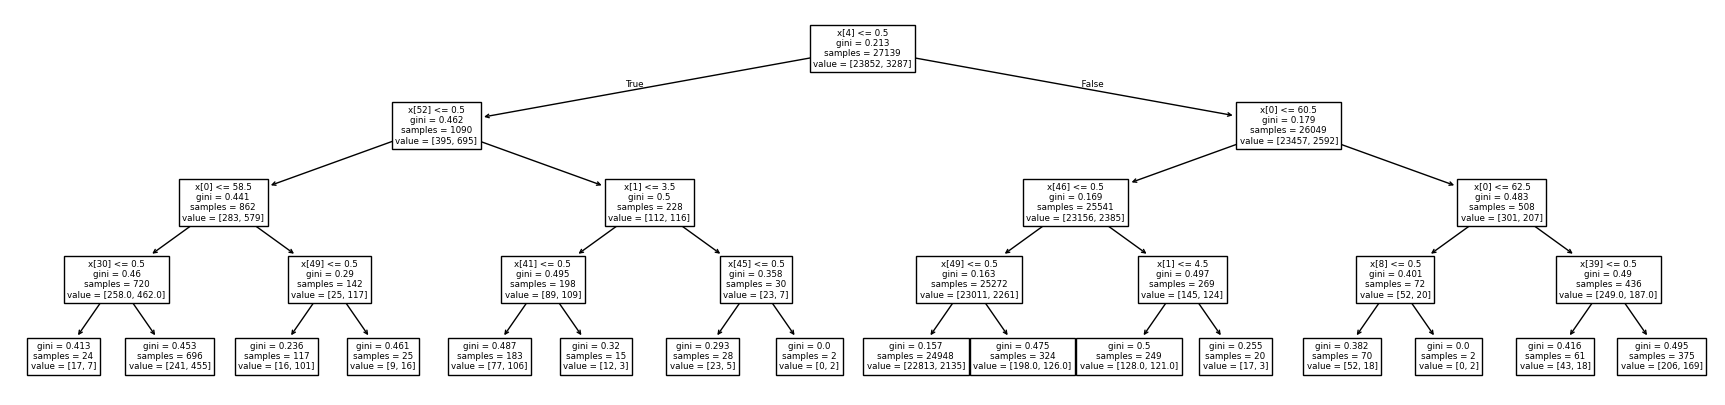

In [85]:
plt.figure(figsize = (22,5))
tree.plot_tree(dtree)
plt.show()

In [86]:
y_train_pred_dt = dtree.predict(X_train)
y_train_pred_dt

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
y_test_pred_dt = dtree.predict(X_test)
y_test_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
training_evaluation(y_train , y_train_pred_dt)

TRAINING

Confusion Matrix : 
 [[23509   343]
 [ 2605   682]]

Training accuracy :  0.8913740373632042

Precision score :  0.6653658536585366


In [89]:
testing_evaluation(y_test , y_test_pred_dt)

TESTING

Confusion Matrix : 
 [[10184   143]
 [ 1040   265]]

Testing accuracy :  0.8982977991746905

Precision score :  0.6495098039215687


### Pruning

In [149]:
parameters = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['sqrt' , 'auto' , 'log2']
}

In [150]:
dtree2 = DecisionTreeClassifier(random_state = 42)
grid = GridSearchCV(dtree2 , param_grid = parameters , cv = 5 ,scoring = 'accuracy')
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [151]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [152]:
y_train_pred_dt2 = grid.predict(X_train)
y_train_pred_dt2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [153]:
y_test_pred_dt2 = grid.predict(X_test)
y_test_pred_dt2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [154]:
training_evaluation(y_train , y_train_pred_dt2)

TRAINING

Confusion Matrix : 
 [[23550   302]
 [ 2667   620]]

Training accuracy :  0.8906002431924537

Precision score :  0.6724511930585684


In [155]:
testing_evaluation(y_test , y_test_pred_dt2)

TESTING

Confusion Matrix : 
 [[10207   120]
 [ 1074   231]]

Testing accuracy :  0.8973521320495186

Precision score :  0.6581196581196581


## 5. Random Forest Classifier

In [157]:
rf = RandomForestClassifier(oob_score = True , random_state = 42)
rf.fit(X_train , y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [158]:
y_train_pred_rf = rf.predict(X_train)
y_train_pred_rf

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
training_evaluation(y_train , y_train_pred_rf)

TRAINING

Confusion Matrix : 
 [[23824    28]
 [  133  3154]]

Training accuracy :  0.9940675780242455

Precision score :  0.9912005028284098


In [161]:
testing_evaluation(y_test , y_test_pred_rf)

TESTING

Confusion Matrix : 
 [[9959  368]
 [1007  298]]

Testing accuracy :  0.8817916093535075

Precision score :  0.44744744744744747


## 6. BOOSTING

In [162]:
ab = AdaBoostClassifier(n_estimators = 100 , random_state = 42)
ab.fit(X_train , y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [163]:
ab.score(X_train , y_train)


0.8903423118022035

In [164]:
ab.score(X_test , y_test)

0.8951169188445667

In [165]:
y_train_pred_ab = ab.predict(X_train)
y_train_pred_ab

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
y_test_pred_ab = ab.predict(X_test)
y_test_pred_ab

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
training_evaluation(y_train , y_train_pred_ab)

TRAINING

Confusion Matrix : 
 [[23477   375]
 [ 2601   686]]

Training accuracy :  0.8903423118022035

Precision score :  0.646559849198869


In [168]:
testing_evaluation(y_test , y_test_pred_ab)

TESTING

Confusion Matrix : 
 [[10169   158]
 [ 1062   243]]

Testing accuracy :  0.8951169188445667

Precision score :  0.6059850374064838


# MODEL TRAINING USING DECISION TREE CLASSIFIER

In [169]:
parameters = {
    'criterion' : ['gini' , 'entropy' , 'log_loss'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['sqrt' , 'auto' , 'log2']
}

In [170]:
dtree2 = DecisionTreeClassifier(random_state = 42)
grid = GridSearchCV(dtree2 , param_grid = parameters , cv = 5 ,scoring = 'accuracy')
grid.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [171]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

# Model Prediction

In [176]:
y_train_pred_dt2 = grid.predict(X_train)
y_train_pred_dt2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [177]:
y_test_pred_dt2 = grid.predict(X_test)
y_test_pred_dt2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Model Evaluation

In [181]:
training_evaluation(y_train , y_train_pred_dt2)

TRAINING

Confusion Matrix : 
 [[23550   302]
 [ 2667   620]]

Training accuracy :  0.8906002431924537

Precision score :  0.6724511930585684


In [182]:
testing_evaluation(y_test , y_test_pred_dt2)

TESTING

Confusion Matrix : 
 [[10207   120]
 [ 1074   231]]

Testing accuracy :  0.8973521320495186

Precision score :  0.6581196581196581
